In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", index_col="id_mls")

# First Glance

In [3]:
df.head()

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,4 + 0,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,-83.010728,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005717,26639234,1,3 + 1,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,-83.011820,42.308966,Freehold,1,30X117.25,0,https://realtor.ca/real-estate/26639234/1353-h...,638464537595600000,N8X4R2,Ontario,391353.0
24005774,26639230,2,2 + 0,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,-83.029633,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005776,26639229,3,4 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,-83.087577,42.228649,Freehold,1,53.92XIRREG FT,0,https://realtor.ca/real-estate/26639229/2580-m...,638464537566770000,N9J2M6,Ontario,959900.0
24005786,26639225,1,4 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,-83.056441,42.304613,Freehold,1,25X109.25,0,https://realtor.ca/real-estate/26639225/722-br...,638464537547170000,N9B2M6,Ontario,299900.0


In [4]:
df.shape

(164661, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164661 entries, 24005541 to 5269
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        164661 non-null  int64  
 1   bathrooms_total           164661 non-null  int64  
 2   bedrooms                  164661 non-null  object 
 3   stories_total             90374 non-null   float64
 4   size_interior             84493 non-null   object 
 5   building_type             164661 non-null  object 
 6   agency_name               164661 non-null  object 
 7   agency_type               164661 non-null  object 
 8   property_type             164661 non-null  object 
 9   lng                       164661 non-null  float64
 10  lat                       164661 non-null  float64
 11  ownership_type            164661 non-null  object 
 12  ownership_type_group_ids  164661 non-null  object 
 13  land_size                 143745 non-null  o

In [6]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,4 + 0,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,-83.010728,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005774,26639230,2,2 + 0,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,-83.029633,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005778,26638941,2,2 + 0,NaN,1100.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,-83.024184,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005752,26635889,2,1 + 0,NaN,892.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.025592,42.236610,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26635889/4578-h...,638463890619270000,N8H1H3,Ontario,399900.0
24005633,26635192,3,4 + 2,NaN,2150.0000,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,Single Family,-83.089044,42.241064,Freehold,1,65X127,0,https://realtor.ca/real-estate/26635192/532-re...,638463818480300000,N9J1B4,Ontario,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15459,26581477,2,2,NaN,1400 sqft,House,EXP Realty,Firm,Single Family,-139.323178,64.040077,none,none,1 ac,0,https://realtor.ca/real-estate/26581477/249-eu...,638452084939830000,Y0B1G0,Yukon,418000.0
15429,26505126,3,3,NaN,1600 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,Single Family,-139.423211,64.064606,none,none,10000 sqft,0,https://realtor.ca/real-estate/26505126/1356-5...,638433592992000000,Y0B1G0,Yukon,415000.0
15253,26147286,0,0,NaN,4232 sqft,none,COLDWELL BANKER REDWOOD REALTY,Firm,Vacant Land,-139.431015,64.064043,none,none,6400 sqft,0,https://realtor.ca/real-estate/26147286/901-2n...,638322220985270000,Y0B1G0,Yukon,920000.0


In [7]:
df_with_size["province"].value_counts()

province
British Columbia           28780
Ontario                    15271
Alberta                    14708
Quebec                     13574
Saskatchewan                4985
Manitoba                    3591
New Brunswick               2268
Newfoundland & Labrador     1162
Yukon                         99
Northwest Territories         55
Name: count, dtype: int64

In [8]:
df["province"].value_counts()

province
Ontario                    46508
Quebec                     38408
British Columbia           33729
Alberta                    19217
Saskatchewan                7092
Nova Scotia                 5918
Manitoba                    4870
New Brunswick               4823
Newfoundland & Labrador     2035
Prince Edward Island        1830
Yukon                        137
Northwest Territories         94
Name: count, dtype: int64

In [9]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,164661.0,164661.0,90374.0,164661.0,164661.0,164661.0,1.646610e+05,164661.0
mean,26306621.0,2.0,2.0,-91.0,48.0,2.0,6.383769e+17,864611.0
std,550147.0,2.0,4.0,21.0,3.0,31.0,1.437022e+14,1815387.0
min,15183441.0,0.0,0.0,-141.0,42.0,0.0,6.355612e+17,0.0
25%,26257014.0,1.0,1.0,-114.0,45.0,0.0,6.383498e+17,290000.0
50%,26483115.0,2.0,2.0,-80.0,46.0,0.0,6.384277e+17,565000.0
75%,26580354.0,3.0,2.0,-74.0,50.0,4.0,6.384519e+17,930000.0
max,26639947.0,79.0,379.0,-53.0,69.0,12362.0,6.384646e+17,399900000.0


# Remove Duplicates

In [10]:
len(df["id"].unique())

164621

In [11]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

80


,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
R2696363,24502592,2,2,4.0,1228 sqft,Apartment,RE/MAX Core Realty,Firm,Single Family,-122.805680,53.901390,Strata,2,0 x 0,0,https://realtor.ca/real-estate/24502592/203-42...,637901368798500000,V2N0J4,British Columbia,400000.0
R2696363,24502592,2,2,4.0,1228 sqft,Apartment,RE/MAX Core Realty,Firm,Single Family,-122.805680,53.901390,Strata,2,0 x 0,0,https://realtor.ca/real-estate/24502592/203-42...,637901368798500000,V2N0J4,British Columbia,400000.0
20902348,26226958,0,0,NaN,NaN,none,RE/MAX de Francheville Inc.,Firm,Vacant Land,-72.750000,47.000000,none,none,15895.8 m2,0,https://realtor.ca/real-estate/26226958/ch-du-...,638342830731870000,G0X2L0,Quebec,149000.0
20902348,26226958,0,0,NaN,NaN,none,RE/MAX de Francheville Inc.,Firm,Vacant Land,-72.750000,47.000000,none,none,15895.8 m2,0,https://realtor.ca/real-estate/26226958/ch-du-...,638342830731870000,G0X2L0,Quebec,149000.0
SK949782,26234438,1,3,1.0,972 sqft,none,Homelife Crawford Realty,Firm,Single Family,-104.547876,50.451989,Freehold,1,3148 sqft,0,https://realtor.ca/real-estate/26234438/143-th...,638344486307870000,S4N5L2,Saskatchewan,159900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C8139628,26618425,2,2,NaN,NaN,Apartment,HOMELIFE/REALTY ONE LTD.,Firm,Single Family,-79.379333,43.662238,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26618425/2102-4...,638459617785670000,M4Y2C2,Ontario,995000.0
W8150358,26634905,4,3 + 1,2.0,NaN,House,SUTTON GROUP OLD MILL REALTY INC.,Firm,Single Family,-79.546053,43.605787,Freehold,1,25 x 120 FT,3,https://realtor.ca/real-estate/26634905/54-lun...,638463796037200000,M8W4M6,Ontario,1799999.0
W8150358,26634905,4,3 + 1,2.0,NaN,House,SUTTON GROUP OLD MILL REALTY INC.,Firm,Single Family,-79.546053,43.605787,Freehold,1,25 x 120 FT,3,https://realtor.ca/real-estate/26634905/54-lun...,638463796037200000,M8W4M6,Ontario,1799999.0


In [12]:
df[df["id"].duplicated()].sort_values("id")

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
R2696363,24502592,2,2,4.0,1228 sqft,Apartment,RE/MAX Core Realty,Firm,Single Family,-122.805680,53.901390,Strata,2,0 x 0,0,https://realtor.ca/real-estate/24502592/203-42...,637901368798500000,V2N0J4,British Columbia,400000.0
20902348,26226958,0,0,NaN,NaN,none,RE/MAX de Francheville Inc.,Firm,Vacant Land,-72.750000,47.000000,none,none,15895.8 m2,0,https://realtor.ca/real-estate/26226958/ch-du-...,638342830731870000,G0X2L0,Quebec,149000.0
SK949782,26234438,1,3,1.0,972 sqft,none,Homelife Crawford Realty,Firm,Single Family,-104.547876,50.451989,Freehold,1,3148 sqft,0,https://realtor.ca/real-estate/26234438/143-th...,638344486307870000,S4N5L2,Saskatchewan,159900.0
R2833162,26290543,2,2,NaN,920 sqft,Apartment,HouseSigma Inc.,Firm,Single Family,-123.231603,49.256192,Leasehold Condo/Strata,2,0,1,https://realtor.ca/real-estate/26290543/610-56...,638358438662200000,V6S0M6,British Columbia,1498000.0
202331950,26357180,2,2,1.0,1176 sqft,House,Re/max Valleyview,Firm,Single Family,-99.974152,49.819178,Freehold Condo,2,Unknown,0,https://realtor.ca/real-estate/26357180/9-diet...,638381811538430000,R7B4K5,Manitoba,304900.0
40526369,26409169,0,0,NaN,NaN,none,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,Vacant Land,-79.426139,46.345141,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26409169/lot-18...,638406712010330000,P1C1M8,Ontario,135000.0
20237716,26409665,0,0,NaN,NaN,none,ROYAL LEPAGE LACHAPELLE - Laverlochère,Firm,Vacant Land,-79.000000,47.400000,none,none,2456.8 m2,0,https://realtor.ca/real-estate/26409665/rue-bé...,638406762214630000,J0Z2N0,Quebec,12000.0
9797459,26413109,0,0,NaN,NaN,none,L'EXPERT IMMOBILIER P.M. INC.,Firm,Vacant Land,-72.750000,47.000000,none,none,63406.9 sqft,0,https://realtor.ca/real-estate/26413109/ch-des...,638408012783500000,G0X2C0,Quebec,92900.0
17037687,26413111,0,0,NaN,NaN,none,L'EXPERT IMMOBILIER P.M. INC.,Firm,Vacant Land,-72.750000,47.000000,none,none,34497.54 sqft,0,https://realtor.ca/real-estate/26413111/ch-des...,638408014227500000,G0X2C0,Quebec,54900.0


In [13]:
df = df.drop_duplicates(subset="id", keep=False)

In [14]:
df[df["id"].duplicated()].sort_values("id")

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,


In [15]:
# df = df.drop(["id", "id_mls"], axis=1)

In [16]:
df.shape

(164581, 20)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164581 entries, 24005541 to 5269
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        164581 non-null  int64  
 1   bathrooms_total           164581 non-null  int64  
 2   bedrooms                  164581 non-null  object 
 3   stories_total             90338 non-null   float64
 4   size_interior             84467 non-null   object 
 5   building_type             164581 non-null  object 
 6   agency_name               164581 non-null  object 
 7   agency_type               164581 non-null  object 
 8   property_type             164581 non-null  object 
 9   lng                       164581 non-null  float64
 10  lat                       164581 non-null  float64
 11  ownership_type            164581 non-null  object 
 12  ownership_type_group_ids  164581 non-null  object 
 13  land_size                 143673 non-null  o

In [18]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  84989
none                      43367
Condominium/Strata        19597
Strata                    10493
Condominium                2401
Leasehold                  1941
Freehold Condo              544
Leasehold Condo/Strata      393
Undivided Co-ownership      265
Unknown                     171
Timeshare/Fractional        125
Leasehold/Leased Land        92
Other, See Remarks           83
Shares in Co-operative       78
Life Lease                   33
Cooperative                   9
Name: count, dtype: int64

In [19]:
df["building_type"].value_counts()

building_type
House                         79894
none                          32392
Apartment                     23954
Row / Townhouse               10324
Duplex                         4536
No Building                    2371
Unknown                        2033
Multi-Family                   1550
Mobile Home                    1493
Triplex                        1375
Other                          1373
Fourplex                        984
Recreational                    715
Manufactured Home               649
Manufactured Home/Mobile        536
Commercial Mix                  146
Modular                         141
Two Apartment House              73
Parking                          22
Residential Commercial Mix       10
Floathome                         7
Special Purpose                   2
Commercial Apartment              1
Name: count, dtype: int64

In [20]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              1185
none                   119
Leasehold               49
Condominium/Strata      14
Freehold Condo           6
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Special Purpose"]

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
1268159,26559011,0,0,1.0,12600 sqft,Special Purpose,RE/MAX Infinity Realty Inc.,Firm,Multi-family,-55.828492,47.470231,Freehold,1,1.23 Acres|1 - 3 acres,0,https://realtor.ca/real-estate/26559011/96-98-...,638447251179830000,A0H1P0,Newfoundland & Labrador,1395000.0
1266884,26405496,0,0,NaN,35562 sqft,Special Purpose,RE/MAX Eastern Edge Realty Ltd. - Bay Roberts,Firm,Multi-family,-53.288650,47.541007,Freehold,1,4.4 Acres|3 - 10 acres,0,https://realtor.ca/real-estate/26405496/84-92-...,638405851200000000,A0A1w0,Newfoundland & Labrador,1199999.0


In [22]:
df["property_type"].value_counts()

property_type
Single Family    124598
Vacant Land       34224
Multi-family       3463
Agriculture        1662
Recreational        609
Parking              20
Other                 4
Business              1
Name: count, dtype: int64

In [23]:
df[df["property_type"] == "Business"]["page_url"]

id_mls
E4367110    https://realtor.ca/real-estate/26335807/750-ma...
Name: page_url, dtype: object

In [24]:
df[df["property_type"] == "Other"]

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
40414495,25543893,0,0,1.0,NaN,none,SUTTON-HURON SHORES REALTY INC. Brokerage,Firm,Other,-81.404990,44.448680,Freehold,1,1.3 ac,20,https://realtor.ca/real-estate/25543893/95-mcv...,638188101027670000,N0H2C0,Ontario,2100000.0
40441276,25849307,0,0,2.0,NaN,none,FOREST HILL REAL ESTATE INC. BROKERAGE,Firm,Other,-79.480892,45.832942,Freehold,1,126.47 ac|101+ acres,0,https://realtor.ca/real-estate/25849307/2035-e...,638253762451100000,P0A1X0,Ontario,2599995.0
40448103,25787680,0,0,1.0,NaN,none,PG Direct Realty Ltd. Brokerage,Firm,Other,-80.867737,47.648915,Freehold,1,7.41 ac|5 - 9.99 acres,200,https://realtor.ca/real-estate/25787680/8856-h...,638240897023430000,P0J1G0,Ontario,1250000.0
40374307,25257302,0,0,0.0,NaN,none,"RE/MAX ADVANTAGE REALTY LTD., BROKERAGE",Firm,Other,-89.597714,48.393784,"Other, See Remarks",none,25.12 ac|25 - 50 acres,0,https://realtor.ca/real-estate/25257302/4650-h...,638114627841230000,P7K0J1,Ontario,2699990.0


In [25]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 40414495 to 40374307
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4 non-null      int64  
 1   bathrooms_total           4 non-null      int64  
 2   bedrooms                  4 non-null      object 
 3   stories_total             4 non-null      float64
 4   size_interior             0 non-null      object 
 5   building_type             4 non-null      object 
 6   agency_name               4 non-null      object 
 7   agency_type               4 non-null      object 
 8   property_type             4 non-null      object 
 9   lng                       4 non-null      float64
 10  lat                       4 non-null      float64
 11  ownership_type            4 non-null      object 
 12  ownership_type_group_ids  4 non-null      object 
 13  land_size                 4 non-null      object 
 14  parki

### Property Type: Single Family

In [26]:
df_sf = df[df["property_type"] == "Single Family"]

In [27]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124598 entries, 24005541 to 5269
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        124598 non-null  int64  
 1   bathrooms_total           124598 non-null  int64  
 2   bedrooms                  124598 non-null  object 
 3   stories_total             87412 non-null   float64
 4   size_interior             81770 non-null   object 
 5   building_type             124598 non-null  object 
 6   agency_name               124598 non-null  object 
 7   agency_type               124598 non-null  object 
 8   property_type             124598 non-null  object 
 9   lng                       124598 non-null  float64
 10  lat                       124598 non-null  float64
 11  ownership_type            124598 non-null  object 
 12  ownership_type_group_ids  124598 non-null  object 
 13  land_size                 103882 non-null  o

In [28]:
df_sf["province"].value_counts()

province
Ontario                    37709
Quebec                     28879
British Columbia           28258
Alberta                    14377
Saskatchewan                4914
Manitoba                    3471
Nova Scotia                 2901
New Brunswick               2089
Newfoundland & Labrador     1093
Prince Edward Island         755
Yukon                         97
Northwest Territories         55
Name: count, dtype: int64

In [29]:
df_sf["building_type"].value_counts()

building_type
House                       79783
Apartment                   23858
Row / Townhouse             10324
Duplex                       3918
none                         1646
Mobile Home                  1493
Triplex                      1106
Fourplex                      738
Manufactured Home             648
Manufactured Home/Mobile      536
Recreational                  216
Modular                       141
Other                          76
Two Apartment House            73
Multi-Family                   31
Floathome                       7
Parking                         2
Unknown                         1
No Building                     1
Name: count, dtype: int64

In [30]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  63298
none                      26039
Condominium/Strata        19237
Strata                    10271
Condominium                2383
Leasehold                  1717
Freehold Condo              531
Leasehold Condo/Strata      382
Undivided Co-ownership      263
Timeshare/Fractional        117
Unknown                     102
Leasehold/Leased Land        92
Shares in Co-operative       69
Other, See Remarks           55
Life Lease                   33
Cooperative                   9
Name: count, dtype: int64

In [31]:
df_sf[df_sf["ownership_type"] == "none"]

,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
X8119996,26622998,3,6 + 1,2.5,NaN,Duplex,IQI GLOBAL REAL ESTATE,Firm,Single Family,-83.017907,42.316294,none,none,35.24 x 124.49 M,0,https://realtor.ca/real-estate/26622998/919-pi...,638460413378770000,N9A0X8,Ontario,599900.0
X8138232,26617006,3,5 + 2,2.0,NaN,Duplex,RE/MAX EXCELLENCE REAL ESTATE,Firm,Single Family,-83.022354,42.314625,none,none,30 x 107.5 FT,2,https://realtor.ca/real-estate/26617006/918-el...,638459478355970000,N9A2A9,Ontario,499000.0
X8126978,26600798,2,4,2.0,NaN,Duplex,RE/MAX METROPOLIS REALTY,Firm,Single Family,-83.036977,42.310172,none,none,41 x 120 FT,4,https://realtor.ca/real-estate/26600798/957-95...,638455265496500000,N9A4N5,Ontario,499999.0
24003413,26559456,2,2 + 1,NaN,1280.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,-83.025095,42.250664,none,none,0X,0,https://realtor.ca/real-estate/26559456/3915-s...,638447331638000000,N9G2S8,Ontario,374900.0
X8060482,26503769,2,3,2.0,NaN,Duplex,RIGHT AT HOME REALTY,Firm,Single Family,-83.021095,42.316386,none,none,40.5 x 151 FT,0,https://realtor.ca/real-estate/26503769/867-la...,638433447881100000,N9A2G9,Ontario,549999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,26517359,1,2,NaN,1661 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,-113.987838,62.564480,none,none,15000,0,https://realtor.ca/real-estate/26517359/39-pre...,638436112417330000,NaN,Northwest Territories,895000.0
15459,26581477,2,2,NaN,1400 sqft,House,EXP Realty,Firm,Single Family,-139.323178,64.040077,none,none,1 ac,0,https://realtor.ca/real-estate/26581477/249-eu...,638452084939830000,Y0B1G0,Yukon,418000.0
15429,26505126,3,3,NaN,1600 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,Single Family,-139.423211,64.064606,none,none,10000 sqft,0,https://realtor.ca/real-estate/26505126/1356-5...,638433592992000000,Y0B1G0,Yukon,415000.0


In [32]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

id_mls
X8119996    https://realtor.ca/real-estate/26622998/919-pi...
X8138232    https://realtor.ca/real-estate/26617006/918-el...
X8126978    https://realtor.ca/real-estate/26600798/957-95...
24003413    https://realtor.ca/real-estate/26559456/3915-s...
X8060482    https://realtor.ca/real-estate/26503769/867-la...
                                  ...                        
5669        https://realtor.ca/real-estate/26517359/39-pre...
15459       https://realtor.ca/real-estate/26581477/249-eu...
15429       https://realtor.ca/real-estate/26505126/1356-5...
5695        https://realtor.ca/real-estate/26589823/1-mart...
5269        https://realtor.ca/real-estate/25255820/1029-t...
Name: page_url, Length: 26039, dtype: object

In [33]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

id_mls
40555558    https://realtor.ca/real-estate/26633499/217-ma...
40547474    https://realtor.ca/real-estate/26569650/39-mil...
40540781    https://realtor.ca/real-estate/26531287/22790-...
40540490    https://realtor.ca/real-estate/26508209/477-ri...
40536395    https://realtor.ca/real-estate/26473426/20-geo...
                                  ...                        
SK930379    https://realtor.ca/real-estate/25638259/513-ac...
SK933718    https://realtor.ca/real-estate/25720722/26917-...
SK933119    https://realtor.ca/real-estate/25713478/221-hi...
SK924595    https://realtor.ca/real-estate/25430766/loon-l...
SK929100    https://realtor.ca/real-estate/25589727/c21-15...
Name: page_url, Length: 141, dtype: object

In [34]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,No Building,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,Unknown,none
province,,,,,,,,,,,,,,,,,,,
Alberta,2524,1010,0,37,8918,47,321,148,0,0,1,0,2,31,1326,6,0,0,6
British Columbia,8356,981,7,38,14293,582,205,135,0,0,0,0,0,36,3534,11,0,0,80
Manitoba,374,122,0,0,2728,0,0,124,0,0,0,20,0,0,103,0,0,0,0
New Brunswick,13,0,0,0,1967,0,0,35,0,0,0,0,0,0,47,0,0,0,27
Newfoundland & Labrador,0,0,0,0,981,0,0,6,0,31,0,0,0,0,0,0,73,0,2
Northwest Territories,9,6,0,1,31,4,0,1,0,0,0,0,0,0,3,0,0,0,0
Nova Scotia,128,35,0,0,2390,0,0,114,0,0,0,0,0,137,71,0,0,0,26
Ontario,6356,171,0,38,24952,1,0,415,121,0,0,56,0,4,4523,64,0,1,1007
Prince Edward Island,36,19,0,0,604,0,0,50,0,0,0,0,0,3,33,0,0,0,10


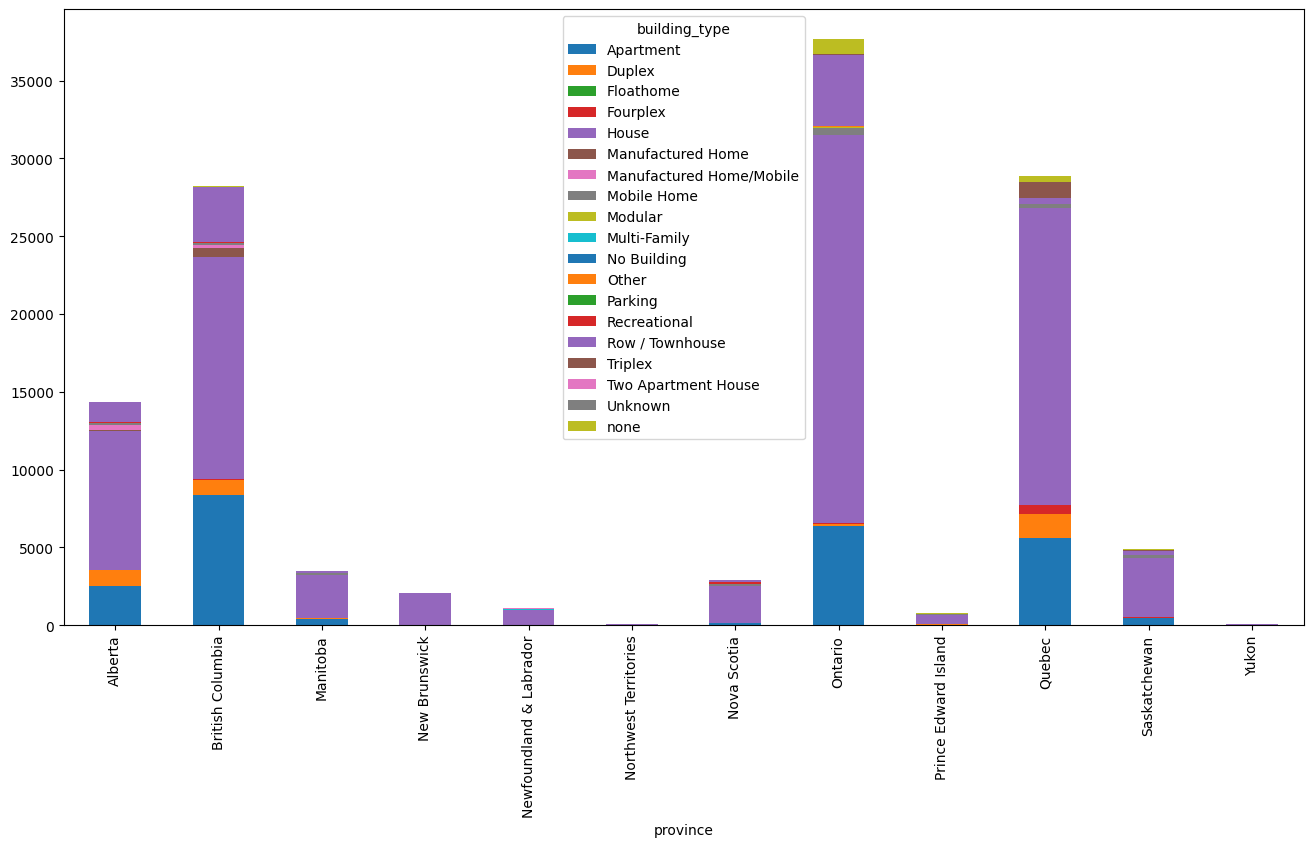

In [35]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

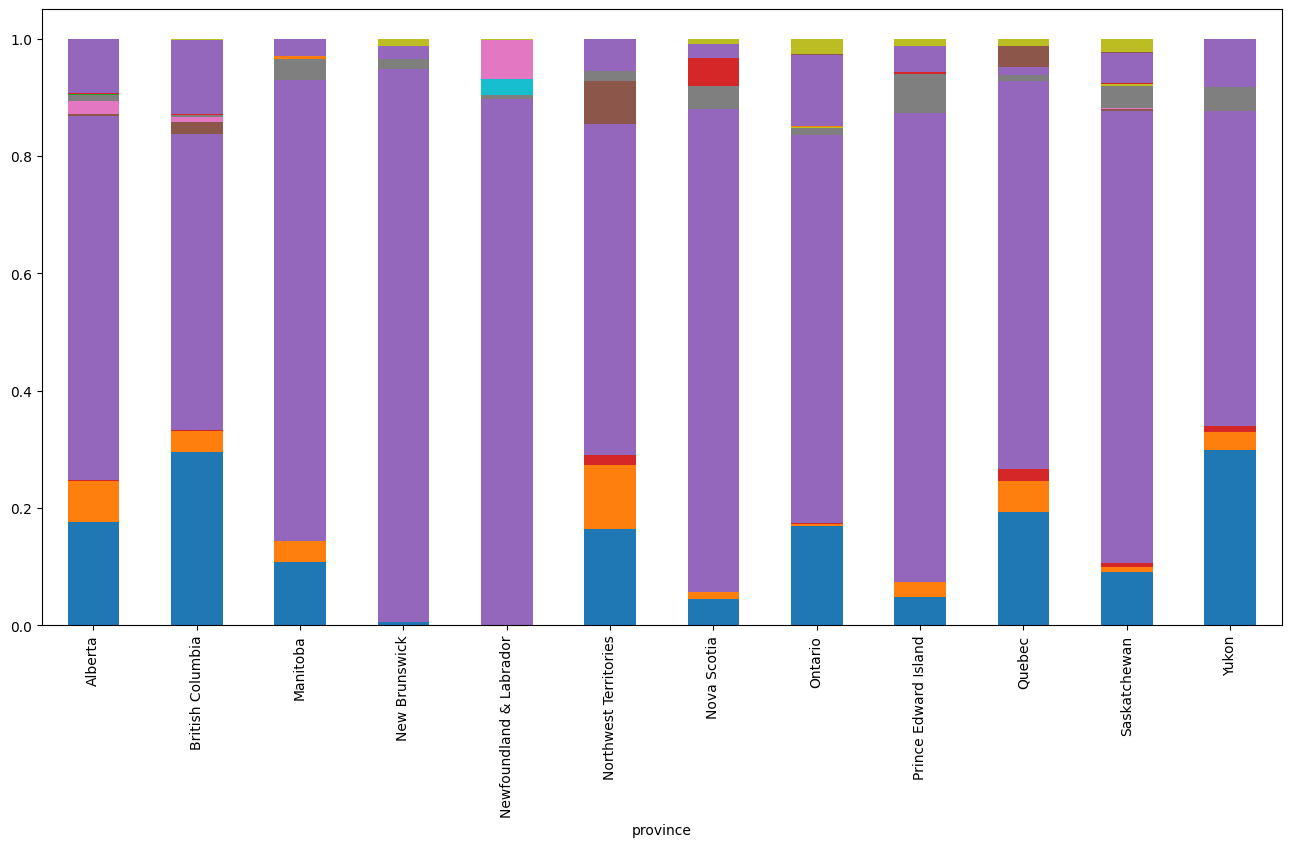

In [36]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [37]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,3956,0,9422,0,86,0,0,2,0,0,0,0,0,0,911
British Columbia,0,2056,0,14380,0,891,350,92,0,34,51,10271,38,0,58,37
Manitoba,0,3,0,2844,531,79,0,0,5,0,0,0,0,0,9,0
New Brunswick,0,60,0,1382,0,45,0,0,0,0,0,0,0,0,4,598
Newfoundland & Labrador,2,0,0,1052,0,9,0,0,0,0,0,0,0,0,0,30
Northwest Territories,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,44
Nova Scotia,0,176,0,2653,0,46,0,0,0,0,0,0,10,1,15,0
Ontario,2381,6225,9,26800,0,416,32,0,26,21,18,0,68,16,0,1697
Prince Edward Island,0,57,0,664,0,16,0,0,0,0,0,0,1,1,16,0


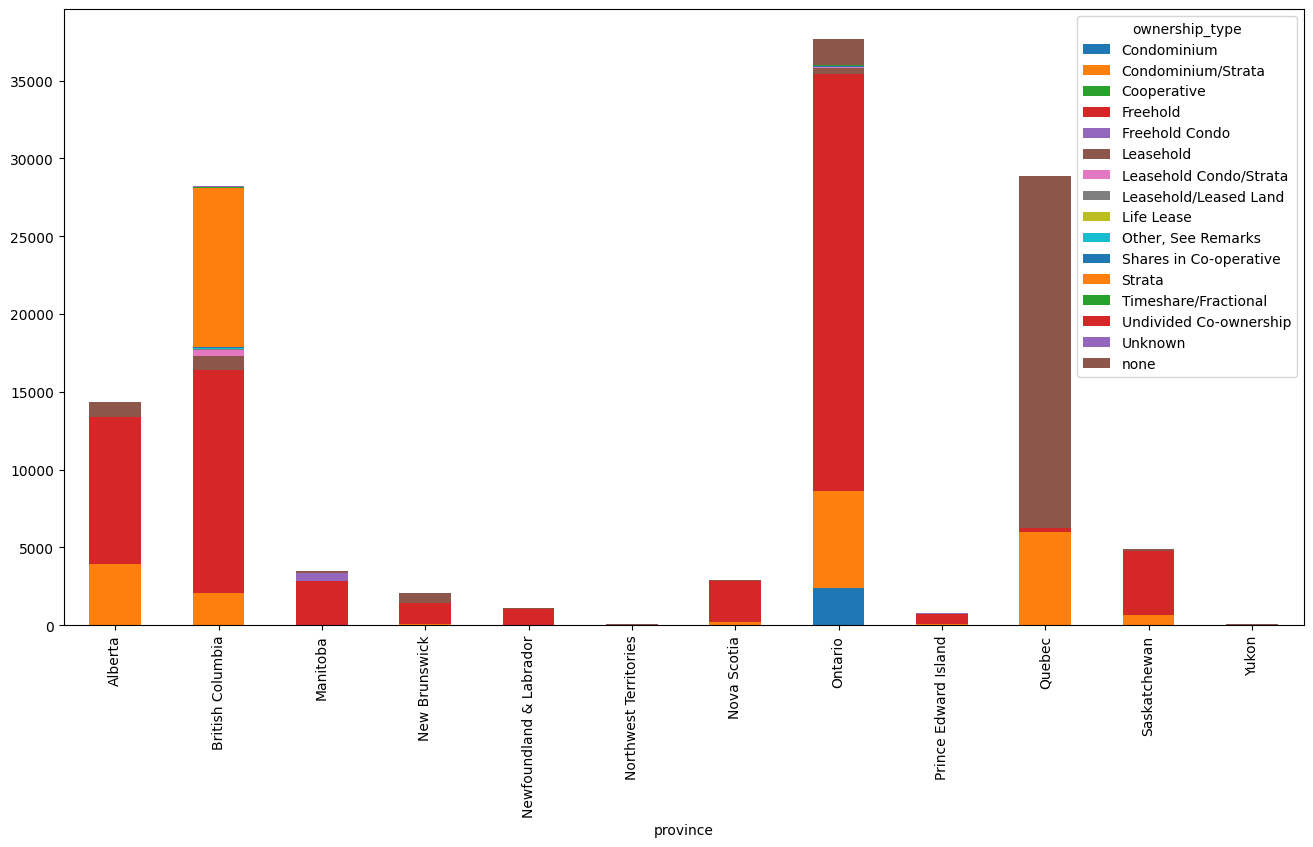

In [38]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

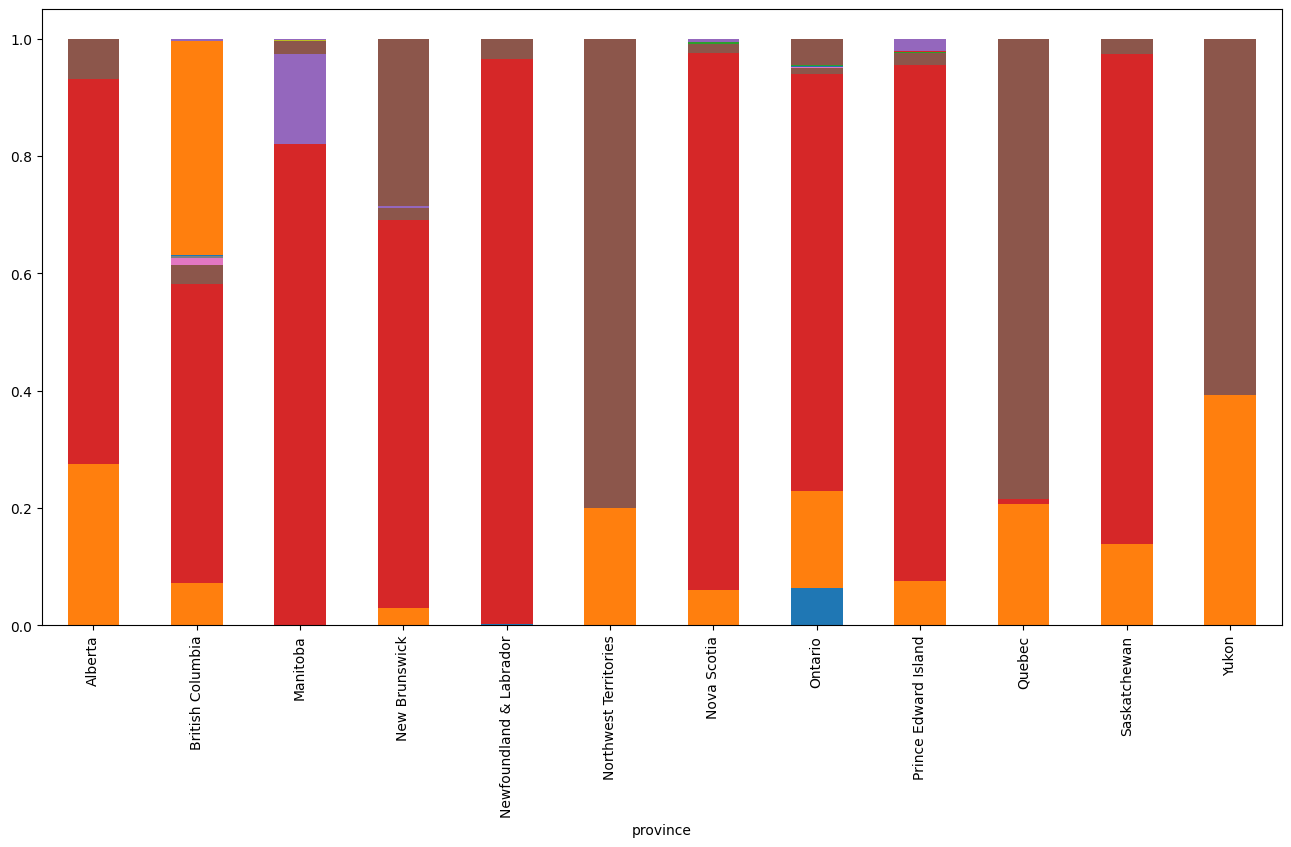

In [39]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [40]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        14499
Strata                     6618
Condominium                1472
Freehold Condo              342
Leasehold Condo/Strata      269
Undivided Co-ownership      257
Freehold                    167
Leasehold                    65
Timeshare/Fractional         56
Shares in Co-operative       42
Life Lease                   19
Leasehold/Leased Land        18
none                         14
Unknown                       8
Cooperative                   7
Other, See Remarks            5
Name: count, dtype: int64

In [41]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
none                      1688
Freehold                  1506
Strata                     477
Condominium/Strata         213
Leasehold                   27
Leasehold Condo/Strata       5
Unknown                      2
Name: count, dtype: int64

In [42]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,No Building,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,Unknown,none
ownership_type,,,,,,,,,,,,,,,,,,,
Condominium,1472,0,0,0,115,0,0,0,2,0,0,0,0,0,779,0,0,0,15
Condominium/Strata,14499,213,0,11,512,0,64,3,1,0,0,14,2,10,3721,1,0,0,186
Cooperative,7,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Freehold,167,1506,1,102,57028,148,400,387,39,31,0,18,0,165,2984,26,71,1,224
Freehold Condo,342,0,0,0,109,0,0,0,0,0,0,6,0,0,74,0,0,0,0
Leasehold,65,27,1,1,501,432,50,477,96,0,0,0,0,5,26,0,1,0,35
Leasehold Condo/Strata,269,5,0,0,8,6,6,1,0,0,0,0,0,3,76,0,0,0,8
Leasehold/Leased Land,18,0,0,0,43,4,0,0,0,0,0,0,0,0,27,0,0,0,0
Life Lease,19,0,0,0,3,0,0,0,0,0,0,0,0,2,9,0,0,0,0


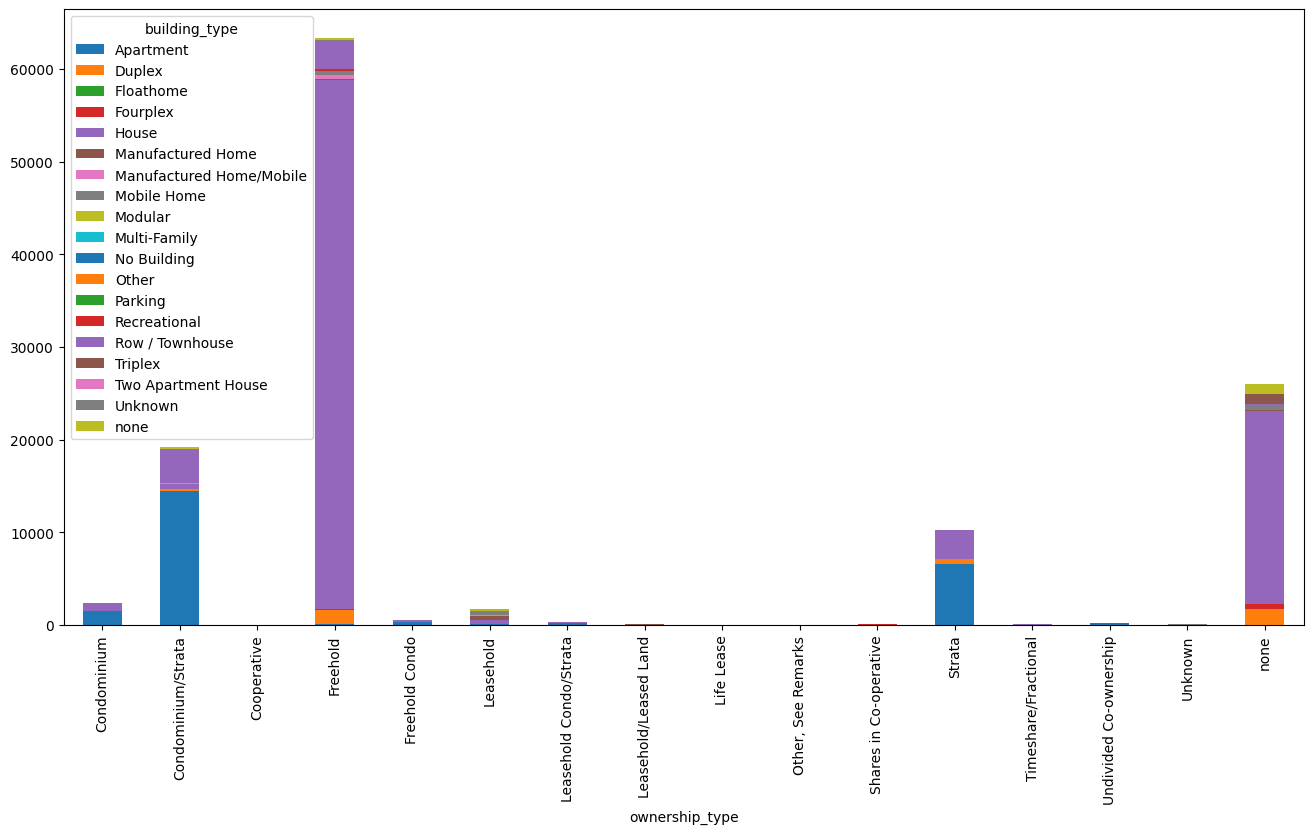

In [43]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

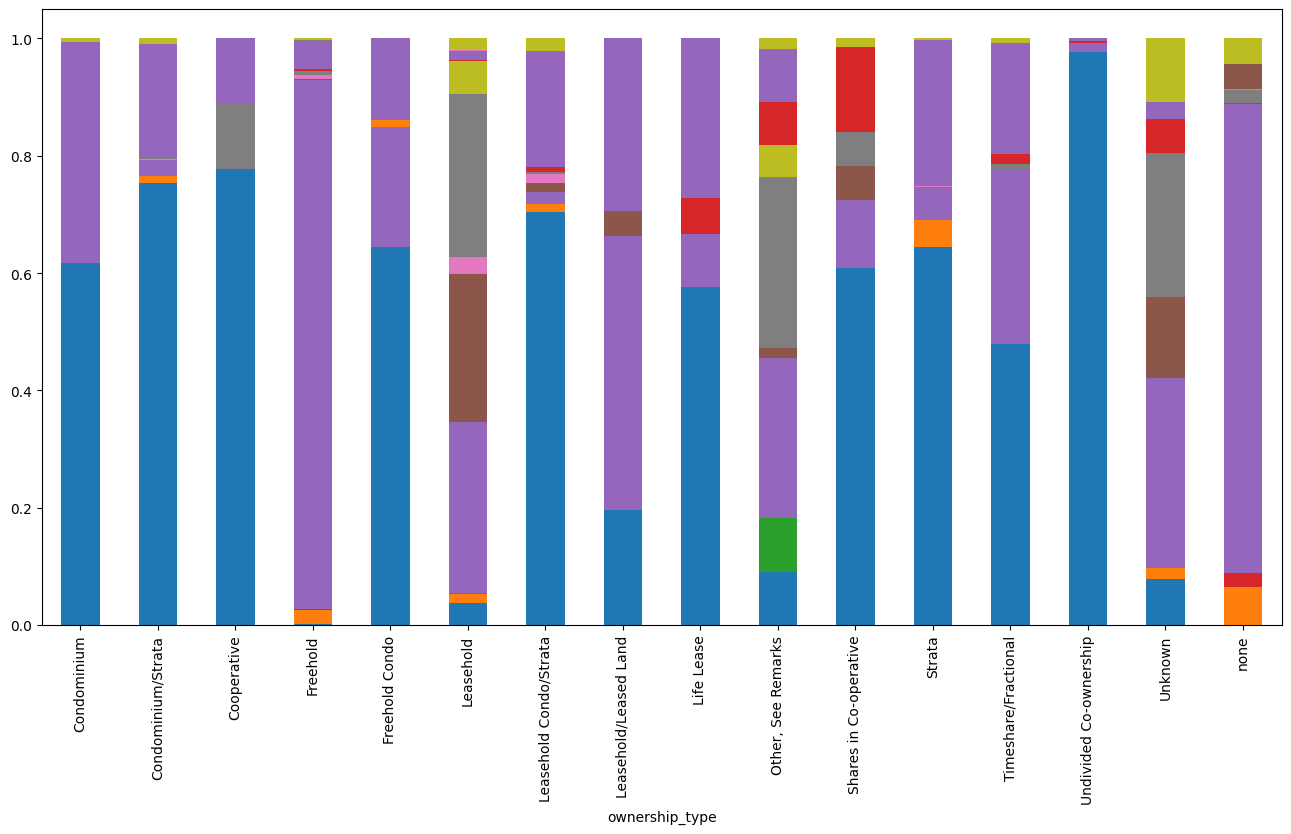

In [44]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [45]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3918.0,3918.0,2066.0,3918.0,3918.0,3918.0,3.918000e+03,3918.0
mean,26406093.0,2.0,2.0,-97.0,49.0,2.0,6.384032e+17,707737.0
std,320314.0,1.0,1.0,22.0,3.0,3.0,8.529057e+13,555078.0
min,22902421.0,0.0,1.0,-135.0,42.0,0.0,6.375090e+17,35000.0
25%,26363157.0,1.0,2.0,-119.0,46.0,0.0,6.383852e+17,359900.0
50%,26504624.0,2.0,2.0,-111.0,49.0,2.0,6.384336e+17,549900.0
75%,26584200.0,3.0,2.0,-74.0,51.0,4.0,6.384526e+17,849000.0
max,26639495.0,9.0,4.0,-60.0,62.0,42.0,6.384646e+17,10500000.0


In [46]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,1106.0,1106.0,502.0,1106.0,1106.0,1106.0,1.106000e+03,1106.0
mean,26376652.0,1.0,2.0,-75.0,46.0,4.0,6.383951e+17,728893.0
std,338371.0,1.0,1.0,7.0,1.0,3.0,9.004383e+13,422447.0
min,23122653.0,0.0,1.0,-126.0,43.0,0.0,6.375514e+17,70000.0
25%,26312927.0,1.0,2.0,-74.0,45.0,0.0,6.383661e+17,419000.0
50%,26496550.0,1.0,2.0,-74.0,46.0,3.0,6.384303e+17,699450.0
75%,26569001.0,1.0,3.0,-73.0,46.0,6.0,6.384491e+17,899999.0
max,26638968.0,12.0,3.0,-62.0,54.0,40.0,6.384645e+17,5500000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,738.0,738.0,344.0,738.0,738.0,738.0,7.380000e+02,738.0
mean,26284291.0,2.0,2.0,-79.0,47.0,4.0,6.383699e+17,756783.0
std,412440.0,1.0,1.0,15.0,3.0,4.0,1.084809e+14,460207.0
min,23395959.0,0.0,0.0,-135.0,42.0,0.0,6.376084e+17,69000.0
25%,26156613.0,1.0,2.0,-76.0,45.0,0.0,6.383258e+17,419250.0
50%,26422078.0,1.0,2.0,-74.0,46.0,4.0,6.384108e+17,649900.0
75%,26552101.0,1.0,2.0,-72.0,48.0,7.0,6.384457e+17,975000.0
max,26638395.0,12.0,4.0,-64.0,62.0,30.0,6.384641e+17,3400000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,10324.0,10324.0,6665.0,10324.0,10324.0,10324.0,1.032400e+04,10324.0
mean,26484826.0,3.0,2.0,-99.0,47.0,2.0,6.384245e+17,768940.0
std,211366.0,1.0,1.0,21.0,3.0,7.0,5.732575e+13,471385.0
min,22060357.0,0.0,1.0,-135.0,42.0,0.0,6.372942e+17,1.0
25%,26444596.0,2.0,2.0,-122.0,44.0,0.0,6.384172e+17,499900.0
50%,26557280.0,3.0,2.0,-97.0,48.0,2.0,6.384466e+17,699000.0
75%,26602872.0,3.0,3.0,-80.0,50.0,2.0,6.384556e+17,899900.0
max,26639500.0,14.0,44.0,-62.0,62.0,544.0,6.384646e+17,10488000.0


In [49]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       79783
Apartment                   23858
Row / Townhouse             10324
Semi-Detached                5762
none                         1646
Mobile Home                  1493
Manufactured Home             648
Manufactured Home/Mobile      536
Recreational                  216
Modular                       141
Other                          76
Two Apartment House            73
Multi-Family                   31
Floathome                       7
Parking                         2
Unknown                         1
No Building                     1
Name: count, dtype: int64

In [50]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              79783
Apartment          23858
Row / Townhouse    10324
Semi-Detached       5762
Name: count, dtype: int64

In [51]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119727 entries, 24005541 to 5269
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        119727 non-null  int64  
 1   bathrooms_total           119727 non-null  int64  
 2   bedrooms                  119727 non-null  object 
 3   stories_total             84529 non-null   float64
 4   size_interior             78363 non-null   object 
 5   building_type             119727 non-null  object 
 6   agency_name               119727 non-null  object 
 7   agency_type               119727 non-null  object 
 8   property_type             119727 non-null  object 
 9   lng                       119727 non-null  float64
 10  lat                       119727 non-null  float64
 11  ownership_type            119727 non-null  object 
 12  ownership_type_group_ids  119727 non-null  object 
 13  land_size                 99787 non-null   o

In [52]:
df_bt["province"].value_counts()

province
Ontario                    36104
Quebec                     28224
British Columbia           27213
Alberta                    13821
Saskatchewan                4571
Manitoba                    3327
Nova Scotia                 2624
New Brunswick               2027
Newfoundland & Labrador      981
Prince Edward Island         692
Yukon                         93
Northwest Territories         50
Name: count, dtype: int64

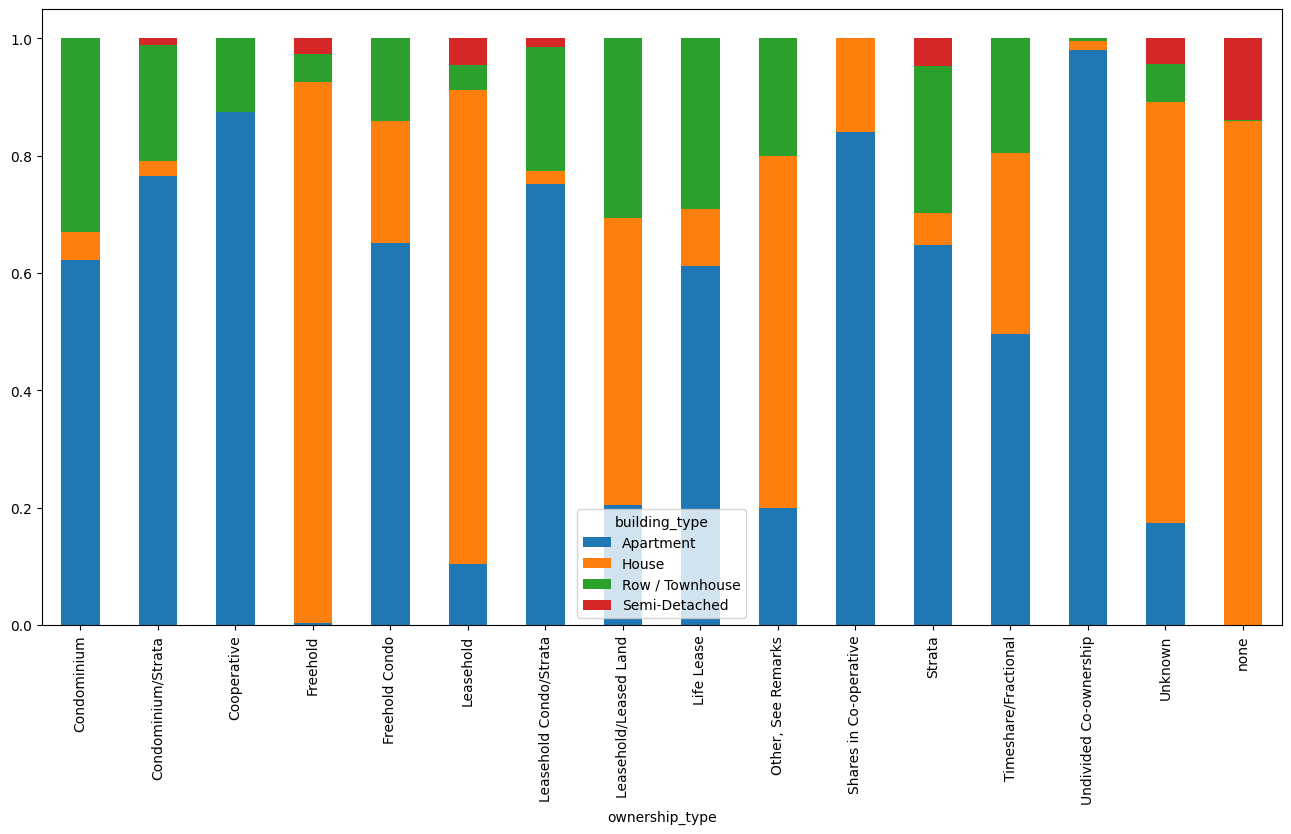

In [53]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [54]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          61813
2          32483
none       24271
4            708
1 2          262
3            113
1 2 3 4       46
2 3           31
Name: count, dtype: int64

In [55]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          57028
none       20818
2           1318
4            544
3             35
1 2 3 4       33
1 2            4
2 3            3
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          23242
1 2          257
1            167
4             83
3             56
none          26
2 3           19
1 2 3 4        8
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none       3391
1          1634
2           707
4            28
1 2 3 4       2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          7216
1          2984
4            53
none         36
3            22
2 3           9
1 2 3 4       3
1 2           1
Name: count, dtype: int64

In [59]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,61813.0,61813.0,47361.0,61813.0,61813.0,61813.0,6.181300e+04,61813.0
mean,26417153.0,3.0,2.0,-95.0,48.0,3.0,6.384061e+17,1133720.0
std,303920.0,1.0,1.0,21.0,4.0,5.0,8.120976e+13,2116273.0
min,20535215.0,0.0,0.0,-134.0,42.0,0.0,6.369052e+17,1.0
25%,26370976.0,2.0,1.0,-114.0,44.0,0.0,6.383886e+17,499000.0
50%,26519374.0,3.0,2.0,-82.0,47.0,2.0,6.384363e+17,782900.0
75%,26593775.0,4.0,2.0,-79.0,50.0,5.0,6.384543e+17,1299000.0
max,26639947.0,20.0,36.0,-53.0,65.0,416.0,6.384646e+17,399900000.0


In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,24271.0,24271.0,21684.0,24271.0,24271.0,24271.0,2.427100e+04,24271.0
mean,26343665.0,2.0,2.0,-75.0,46.0,5.0,6.383863e+17,654724.0
std,390291.0,1.0,1.0,9.0,2.0,5.0,1.036909e+14,628517.0
min,21280320.0,0.0,0.0,-139.0,42.0,0.0,6.370774e+17,1.0
25%,26262722.0,1.0,1.0,-74.0,45.0,2.0,6.383508e+17,349900.0
50%,26484218.0,2.0,2.0,-73.0,46.0,4.0,6.384282e+17,524900.0
75%,26571320.0,2.0,2.0,-72.0,47.0,6.0,6.384492e+17,764950.0
max,26639422.0,14.0,6.0,-53.0,69.0,302.0,6.384646e+17,29000000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,113.0,113.0,75.0,113.0,113.0,113.0,1.130000e+02,113.0
mean,26229048.0,3.0,2.0,-92.0,46.0,1.0,6.383562e+17,178960.0
std,477723.0,1.0,0.0,22.0,2.0,1.0,1.251027e+14,222869.0
min,24221493.0,1.0,1.0,-125.0,44.0,0.0,6.378452e+17,6000.0
25%,26119541.0,2.0,1.0,-123.0,45.0,0.0,6.383161e+17,60000.0
50%,26437402.0,2.0,2.0,-80.0,45.0,0.0,6.384155e+17,114000.0
75%,26506263.0,3.0,2.0,-79.0,49.0,1.0,6.384337e+17,146500.0
max,26639341.0,11.0,3.0,-63.0,50.0,5.0,6.384646e+17,1098000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,708.0,708.0,512.0,708.0,708.0,708.0,7.080000e+02,708.0
mean,26340363.0,2.0,2.0,-108.0,49.0,1.0,6.383858e+17,613278.0
std,367146.0,1.0,1.0,18.0,3.0,2.0,9.747293e+13,524863.0
min,23683612.0,0.0,1.0,-129.0,42.0,0.0,6.376845e+17,1995.0
25%,26247856.0,1.0,1.0,-122.0,49.0,0.0,6.383465e+17,299900.0
50%,26480577.0,2.0,1.0,-119.0,49.0,0.0,6.384275e+17,499900.0
75%,26568477.0,3.0,2.0,-97.0,50.0,2.0,6.384490e+17,769900.0
max,26638354.0,8.0,6.0,-54.0,59.0,13.0,6.384641e+17,6400000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,46.0,46.0,21.0,46.0,46.0,46.0,4.600000e+01,46.0
mean,26288112.0,2.0,2.0,-95.0,48.0,1.0,6.383705e+17,821474.0
std,399803.0,1.0,1.0,28.0,2.0,1.0,1.048250e+14,1109324.0
min,24287086.0,1.0,1.0,-124.0,44.0,0.0,6.378599e+17,15000.0
25%,26162668.0,1.0,1.0,-123.0,46.0,0.0,6.383269e+17,215225.0
50%,26412734.0,2.0,2.0,-100.0,49.0,0.0,6.384079e+17,423750.0
75%,26501238.0,3.0,2.0,-65.0,49.0,1.0,6.384324e+17,799974.0
max,26631706.0,5.0,3.0,-60.0,51.0,8.0,6.384622e+17,5249000.0


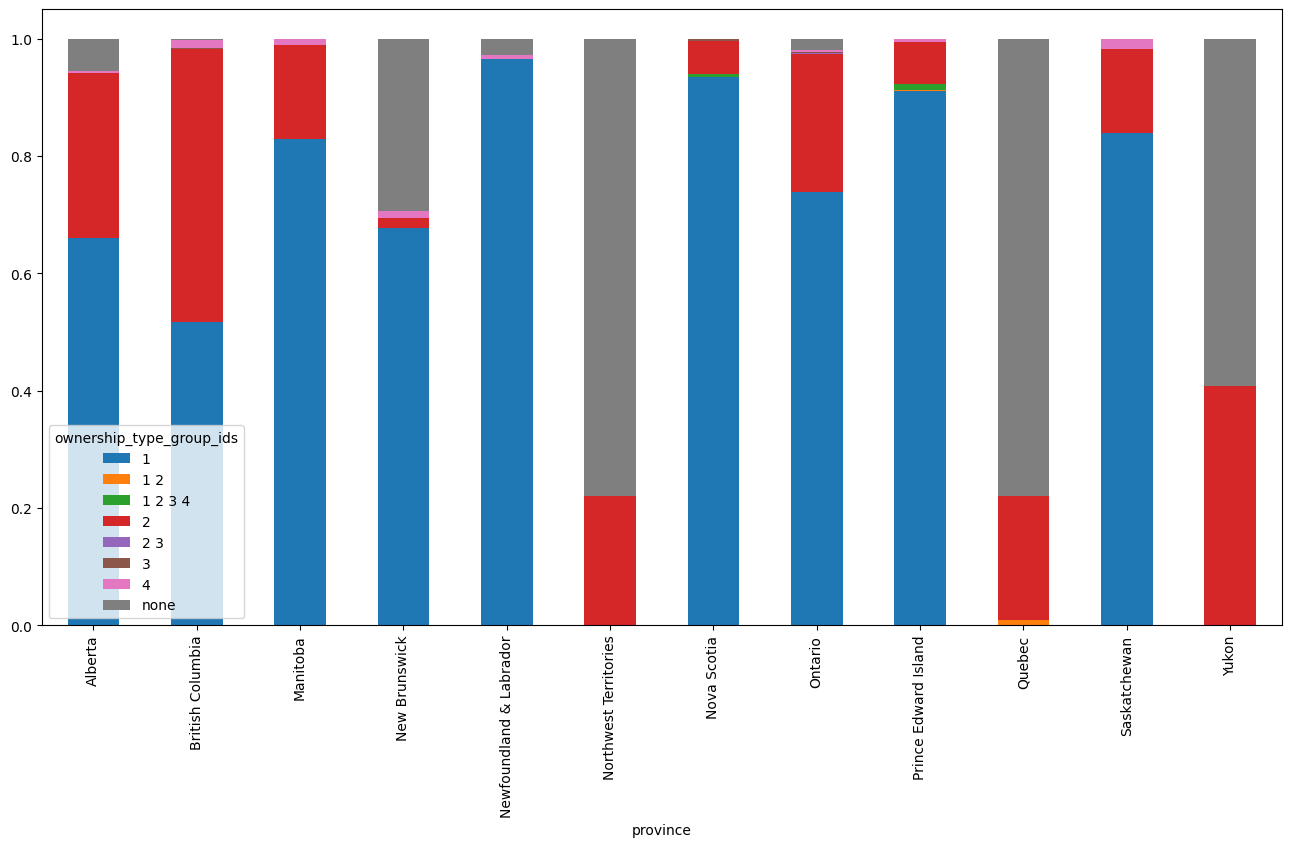

In [64]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [65]:
mask_other = (df_bt["ownership_type_group_ids"] == "none")
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          61813
2          32483
0          24271
4            708
1 2          262
3            113
1 2 3 4       46
2 3           31
Name: count, dtype: int64

In [66]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 3: Other

ownership_type_group_ids
1    61813
2    32483
0    24271
Name: count, dtype: int64

In [67]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118567 entries, 24005541 to 5269
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        118567 non-null  int64  
 1   bathrooms_total           118567 non-null  int64  
 2   bedrooms                  118567 non-null  object 
 3   stories_total             83677 non-null   float64
 4   size_interior             77313 non-null   object 
 5   building_type             118567 non-null  object 
 6   agency_name               118567 non-null  object 
 7   agency_type               118567 non-null  object 
 8   property_type             118567 non-null  object 
 9   lng                       118567 non-null  float64
 10  lat                       118567 non-null  float64
 11  ownership_type            118567 non-null  object 
 12  ownership_type_group_ids  118567 non-null  object 
 13  land_size                 98866 non-null   o

In [68]:
df_oti_new["province"].value_counts()

province
Ontario                    35873
Quebec                     27979
British Columbia           26749
Alberta                    13791
Saskatchewan                4492
Manitoba                    3284
Nova Scotia                 2601
New Brunswick               2001
Newfoundland & Labrador      974
Prince Edward Island         680
Yukon                         93
Northwest Territories         50
Name: count, dtype: int64

In [69]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [70]:
df = df_oti_new

In [71]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_9551/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    81995
True     36572
Name: count, dtype: int64

In [72]:
df.shape

(118567, 20)

In [73]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_9551/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,4 + 0,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,-83.010728,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005717,26639234,1,3 + 1,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,-83.011820,42.308966,Freehold,1,30X117.25,0,https://realtor.ca/real-estate/26639234/1353-h...,638464537595600000,N8X4R2,Ontario,391353.0
24005774,26639230,2,2 + 0,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,-83.029633,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005776,26639229,3,4 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,-83.087577,42.228649,Freehold,1,53.92XIRREG FT,0,https://realtor.ca/real-estate/26639229/2580-m...,638464537566770000,N9J2M6,Ontario,959900.0
24005786,26639225,1,4 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,-83.056441,42.304613,Freehold,1,25X109.25,0,https://realtor.ca/real-estate/26639225/722-br...,638464537547170000,N9B2M6,Ontario,299900.0


In [74]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_9551/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [75]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [76]:
pd.DataFrame(bed_extra).value_counts()

0    19503
1    10519
2     5380
3     1009
4      132
5       23
6        5
8        1
Name: count, dtype: int64

In [77]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [78]:
len(bedrooms_extra)

118567

In [79]:
bedrooms_extra[:20]

['0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '2',
 '2',
 '0',
 '2',
 '3']

In [80]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [81]:
df.head(10)

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,0,4 + 0,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005717,26639234,1,1,3 + 1,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.308966,Freehold,1,30X117.25,0,https://realtor.ca/real-estate/26639234/1353-h...,638464537595600000,N8X4R2,Ontario,391353.0
24005774,26639230,2,0,2 + 0,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005776,26639229,3,0,4 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.228649,Freehold,1,53.92XIRREG FT,0,https://realtor.ca/real-estate/26639229/2580-m...,638464537566770000,N9J2M6,Ontario,959900.0
24005786,26639225,1,0,4 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.304613,Freehold,1,25X109.25,0,https://realtor.ca/real-estate/26639225/722-br...,638464537547170000,N9B2M6,Ontario,299900.0
24005791,26639222,1,0,2 + 0,1.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.288938,Freehold,1,35XIRREG,0,https://realtor.ca/real-estate/26639222/2633-p...,638464537539070000,N8X4K6,Ontario,199000.0
24005790,26639223,1,0,2 + 0,1.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.290649,Freehold,1,39.15X124.5,0,https://realtor.ca/real-estate/26639223/3576-g...,638464537541170000,N9C1W3,Ontario,199900.0
24005778,26638941,2,0,2 + 0,NaN,1100.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005775,26638943,1,0,3 + 0,1.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.302468,Freehold,1,40X98.32,0,https://realtor.ca/real-estate/26638943/911-br...,638464501539600000,N9B2M9,Ontario,399000.0


In [82]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_9551/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118567 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        118567 non-null  int64  
 1   bathrooms_total           118567 non-null  int64  
 2   bedrooms_extra            118567 non-null  object 
 3   bedrooms                  118567 non-null  object 
 4   stories_total             83677 non-null   float64
 5   size_interior             77313 non-null   object 
 6   building_type             118567 non-null  object 
 7   agency_name               118567 non-null  object 
 8   agency_type               118567 non-null  object 
 9   property_type             118567 non-null  object 
 10  lng                       118567 non-null  float64
 11  lat                       118567 non-null  float64
 12  ownership_type            118567 non-null  object 
 13  ownership_type_group_ids  118567 non-null  o

In [84]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_9551/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [85]:
df.head(10)

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,0,4,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005717,26639234,1,1,3,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.308966,Freehold,1,30X117.25,0,https://realtor.ca/real-estate/26639234/1353-h...,638464537595600000,N8X4R2,Ontario,391353.0
24005774,26639230,2,0,2,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005776,26639229,3,0,4,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.228649,Freehold,1,53.92XIRREG FT,0,https://realtor.ca/real-estate/26639229/2580-m...,638464537566770000,N9J2M6,Ontario,959900.0
24005786,26639225,1,0,4,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.304613,Freehold,1,25X109.25,0,https://realtor.ca/real-estate/26639225/722-br...,638464537547170000,N9B2M6,Ontario,299900.0
24005791,26639222,1,0,2,1.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.288938,Freehold,1,35XIRREG,0,https://realtor.ca/real-estate/26639222/2633-p...,638464537539070000,N8X4K6,Ontario,199000.0
24005790,26639223,1,0,2,1.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.290649,Freehold,1,39.15X124.5,0,https://realtor.ca/real-estate/26639223/3576-g...,638464537541170000,N9C1W3,Ontario,199900.0
24005778,26638941,2,0,2,NaN,1100.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005775,26638943,1,0,3,1.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.302468,Freehold,1,40X98.32,0,https://realtor.ca/real-estate/26638943/911-br...,638464501539600000,N9B2M9,Ontario,399000.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118567 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        118567 non-null  int64  
 1   bathrooms_total           118567 non-null  int64  
 2   bedrooms_extra            118567 non-null  int64  
 3   bedrooms                  118567 non-null  int64  
 4   stories_total             83677 non-null   float64
 5   size_interior             77313 non-null   object 
 6   building_type             118567 non-null  object 
 7   agency_name               118567 non-null  object 
 8   agency_type               118567 non-null  object 
 9   property_type             118567 non-null  object 
 10  lng                       118567 non-null  float64
 11  lat                       118567 non-null  float64
 12  ownership_type            118567 non-null  object 
 13  ownership_type_group_ids  118567 non-null  o

## Handling Storeys

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118567 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        118567 non-null  int64  
 1   bathrooms_total           118567 non-null  int64  
 2   bedrooms_extra            118567 non-null  int64  
 3   bedrooms                  118567 non-null  int64  
 4   stories_total             83677 non-null   float64
 5   size_interior             77313 non-null   object 
 6   building_type             118567 non-null  object 
 7   agency_name               118567 non-null  object 
 8   agency_type               118567 non-null  object 
 9   property_type             118567 non-null  object 
 10  lng                       118567 non-null  float64
 11  lat                       118567 non-null  float64
 12  ownership_type            118567 non-null  object 
 13  ownership_type_group_ids  118567 non-null  o

In [88]:
df.head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,0,4,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005717,26639234,1,1,3,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.308966,Freehold,1,30X117.25,0,https://realtor.ca/real-estate/26639234/1353-h...,638464537595600000,N8X4R2,Ontario,391353.0
24005774,26639230,2,0,2,NaN,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005776,26639229,3,0,4,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.228649,Freehold,1,53.92XIRREG FT,0,https://realtor.ca/real-estate/26639229/2580-m...,638464537566770000,N9J2M6,Ontario,959900.0
24005786,26639225,1,0,4,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.304613,Freehold,1,25X109.25,0,https://realtor.ca/real-estate/26639225/722-br...,638464537547170000,N9B2M6,Ontario,299900.0


In [89]:
df["stories_total"].value_counts().sort_index()

stories_total
0.00          3
1.00      33118
1.50       3644
1.75        249
2.00      36643
          ...  
197.00        1
232.00        1
250.00        1
265.00        1
379.00        1
Name: count, Length: 76, dtype: int64

In [90]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
0.00         3
1.00     33118
1.50      3644
1.75       249
2.00     36643
2.50       654
3.00      5078
3.50         5
4.00      1476
5.00       303
6.00       587
7.00       168
8.00       235
9.00        79
10.00      105
11.00       43
12.00      113
13.00       46
14.00       77
15.00       82
Name: count, dtype: int64

In [91]:
df[df["stories_total"] == 0].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
21104086,26256637,1,0,2,0.0,NaN,Semi-Detached,VIA CAPITALE SAGUENAY LAC ST-JEAN,Firm,Single Family,...,48.419348,none,0,944.8 m2,8,https://realtor.ca/real-estate/26256637/3647-r...,638349781200270000,G7X2G3,Quebec,995000.0
R2853994,26560889,3,0,3,0.0,2836 sqft,House,RE/MAX Quesnel Realty (1976),Firm,Single Family,...,52.921158,Freehold,1,10.49 ac,0,https://realtor.ca/real-estate/26560889/2919-h...,638447450458000000,V2J6P7,British Columbia,649900.0
R2765088,25433117,2,0,3,0.0,1352 sqft,House,RE/MAX Action Realty Inc,Firm,Single Family,...,56.731836,Freehold,1,12362 sqft,0,https://realtor.ca/real-estate/25433117/19233-...,638162259069500000,V0C2N0,British Columbia,219900.0


In [92]:
df[df["stories_total"] == 0]["building_type"].value_counts()

building_type
House            2
Semi-Detached    1
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0]["page_url"]

id_mls
21104086    https://realtor.ca/real-estate/26256637/3647-r...
R2853994    https://realtor.ca/real-estate/26560889/2919-h...
R2765088    https://realtor.ca/real-estate/25433117/19233-...
Name: page_url, dtype: object

In [94]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
House              15053
Apartment          13357
Row / Townhouse     3639
Semi-Detached       2841
Name: count, dtype: int64

In [95]:
df[df["stories_total"].isna()]["page_url"]

id_mls
24005774    https://realtor.ca/real-estate/26639230/1655-g...
24005778    https://realtor.ca/real-estate/26638941/2650-s...
24005764    https://realtor.ca/real-estate/26638625/380-pe...
24005752    https://realtor.ca/real-estate/26635889/4578-h...
24005633    https://realtor.ca/real-estate/26635192/532-re...
                                  ...                        
5669        https://realtor.ca/real-estate/26517359/39-pre...
15459       https://realtor.ca/real-estate/26581477/249-eu...
15429       https://realtor.ca/real-estate/26505126/1356-5...
5695        https://realtor.ca/real-estate/26589823/1-mart...
5269        https://realtor.ca/real-estate/25255820/1029-t...
Name: page_url, Length: 34890, dtype: object

In [96]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118567 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        118567 non-null  int64  
 1   bathrooms_total           118567 non-null  int64  
 2   bedrooms_extra            118567 non-null  int64  
 3   bedrooms                  118567 non-null  int64  
 4   stories_total             118567 non-null  float64
 5   size_interior             77313 non-null   object 
 6   building_type             118567 non-null  object 
 7   agency_name               118567 non-null  object 
 8   agency_type               118567 non-null  object 
 9   property_type             118567 non-null  object 
 10  lng                       118567 non-null  float64
 11  lat                       118567 non-null  float64
 12  ownership_type            118567 non-null  object 
 13  ownership_type_group_ids  118567 non-null  o

In [97]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     68011
2.00     36643
3.00      5078
1.50      3644
4.00      1476
2.50       654
6.00       587
5.00       303
1.75       249
8.00       235
7.00       168
12.00      113
10.00      105
15.00       82
9.00        79
14.00       77
16.00       69
17.00       65
21.00       60
20.00       57
Name: count, dtype: int64

In [98]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

id_mls
24003393    https://realtor.ca/real-estate/26559213/801-vi...
X8076150    https://realtor.ca/real-estate/26526399/446-wy...
24000580    https://realtor.ca/real-estate/26403157/693-69...
24000508    https://realtor.ca/real-estate/26399997/150-la...
23025692    https://realtor.ca/real-estate/26363328/3670-c...
                                  ...                        
R2859982    https://realtor.ca/real-estate/26629751/5308-5...
R2851329    https://realtor.ca/real-estate/26535398/5408-5...
R2828480    https://realtor.ca/real-estate/26227015/6-5320...
R2818014    https://realtor.ca/real-estate/26086191/5615-a...
R2847363    https://realtor.ca/real-estate/26486359/1-moos...
Name: page_url, Length: 5078, dtype: object

In [99]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  4363
Alberta                 1293
British Columbia         999
Ontario                  349
Saskatchewan              18
Prince Edward Island       7
Nova Scotia                6
Manitoba                   5
New Brunswick              2
Name: count, dtype: int64

In [100]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

id_mls
23024131    https://realtor.ca/real-estate/26332816/3402-s...
X8138794    https://realtor.ca/real-estate/26617877/w-9-15...
40553716    https://realtor.ca/real-estate/26617226/1500-v...
24001804    https://realtor.ca/real-estate/26468953/7555-w...
40554330    https://realtor.ca/real-estate/26633811/2062-l...
                                  ...                        
A2096527    https://realtor.ca/real-estate/26336386/214-11...
A2095265    https://realtor.ca/real-estate/26313323/204-13...
A2092005    https://realtor.ca/real-estate/26261288/110-99...
A2089984    https://realtor.ca/real-estate/26222650/316-23...
A2040605    https://realtor.ca/real-estate/25478707/207-23...
Name: page_url, Length: 7042, dtype: object

In [101]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

id_mls
24005541    False
24005717    False
24005774    False
24005776    False
24005786    False
            ...  
15459       False
15429       False
5695        False
X8059292    False
5269        False
Length: 118567, dtype: bool

In [102]:
~mask_apt_storey

id_mls
24005541    True
24005717    True
24005774    True
24005776    True
24005786    True
            ... 
15459       True
15429       True
5695        True
X8059292    True
5269        True
Length: 118567, dtype: bool

In [103]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [104]:
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [105]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     68011
2.00     35792
1.50      3634
3.00      3092
2.50       650
1.75       249
4.00        73
5.00         9
3.50         5
6.00         4
38.00        2
44.00        2
16.00        1
28.00        1
Name: count, dtype: int64

In [106]:
df_storey["stories_total"].unique()

array([ 2.5 ,  2.  ,  1.  ,  1.5 ,  1.75,  3.  ,  4.  , 38.  ,  5.  ,
       16.  , 44.  ,  6.  , 28.  ,  3.5 ])

In [107]:
df = df_storey

## Handling Interior Size (Phase 1)

### First Looks

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   object 
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [109]:
df["size_interior"].value_counts()

size_interior
1200 sqft      206
1120 sqft      178
1200.0000      167
1040 sqft      161
960 sqft       154
              ... 
7664 sqft        1
7340 sqft        1
3835 sqft        1
5157 sqft        1
845.45 sqft      1
Name: count, Length: 18676, dtype: int64

In [110]:
df[df["size_interior"].notna()]

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,0,4,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005774,26639230,2,0,2,1.0,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005778,26638941,2,0,2,1.0,1100.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005752,26635889,2,0,1,1.0,892.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236610,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26635889/4578-h...,638463890619270000,N8H1H3,Ontario,399900.0
24005633,26635192,3,2,4,1.0,2150.0000,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,Single Family,...,42.241064,Freehold,1,65X127,0,https://realtor.ca/real-estate/26635192/532-re...,638463818480300000,N9J1B4,Ontario,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,26517359,1,0,2,1.0,1661 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.564480,none,0,15000,0,https://realtor.ca/real-estate/26517359/39-pre...,638436112417330000,NaN,Northwest Territories,895000.0
15459,26581477,2,0,2,1.0,1400 sqft,House,EXP Realty,Firm,Single Family,...,64.040077,none,0,1 ac,0,https://realtor.ca/real-estate/26581477/249-eu...,638452084939830000,Y0B1G0,Yukon,418000.0
15429,26505126,3,0,3,1.0,1600 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,Single Family,...,64.064606,none,0,10000 sqft,0,https://realtor.ca/real-estate/26505126/1356-5...,638433592992000000,Y0B1G0,Yukon,415000.0


In [111]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005541,26639235,3,0,4,2.5,2810.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.321421,Freehold,1,45X119.25,0,https://realtor.ca/real-estate/26639235/794-de...,638464537622600000,N8Y2M1,Ontario,849900.0
24005774,26639230,2,0,2,1.0,1072.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005778,26638941,2,0,2,1.0,1100.0000,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005752,26635889,2,0,1,1.0,892.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236610,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26635889/4578-h...,638463890619270000,N8H1H3,Ontario,399900.0
24005633,26635192,3,2,4,1.0,2150.0000,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,Single Family,...,42.241064,Freehold,1,65X127,0,https://realtor.ca/real-estate/26635192/532-re...,638463818480300000,N9J1B4,Ontario,1050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40540873,26514431,1,0,2,1.0,960.0000,House,RE/MAX REAL ESTATE CENTRE INC. BROKERAGE-3,Firm,Single Family,...,49.125418,Freehold,1,under 1/2 acre,3,https://realtor.ca/real-estate/26514431/2-ohsw...,638435392592230000,P0T2C0,Ontario,114900.0
40553165,26616448,4,3,5,1.5,2538.0000,House,PG Direct Realty Ltd.,Firm,Single Family,...,49.108922,Freehold,1,150 ac|101+ acres,10,https://realtor.ca/real-estate/26616448/lot-12...,638459440658370000,P0L1C0,Ontario,599888.0
40552519,26609104,3,0,2,1.0,6623.0000,House,PG Direct Realty Ltd.,Firm,Single Family,...,49.167467,Freehold,1,0.94 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26609104/2323-g...,638457946547470000,P0L1C0,Ontario,662000.0


In [112]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
2475315,26590782,2,0,2,1.0,960.0000,House,RE/MAX Four Seasons (Nelson),Firm,Single Family,...,49.585293,Freehold,1,4498 sqft,0,https://realtor.ca/real-estate/26590782/3220-h...,638453612146130000,V1L6M7,Alberta,880000.0
A2113649,26604805,1,0,1,1.0,814 sqft,House,CIR REALTY,Firm,Single Family,...,49.631481,Freehold,1,"11000 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",4,https://realtor.ca/real-estate/26604805/1337-8...,638456982130100000,T0K0M0,Alberta,215000.0
A2113169,26599194,2,0,1,1.0,1660 sqft,House,PG Direct Realty Ltd.,Firm,Single Family,...,49.583890,Freehold,1,"8250 sqft|7,251 - 10,889 sqft",6,https://realtor.ca/real-estate/26599194/439-pa...,638455161431030000,T0K1H0,Alberta,470000.0
A2109498,26590277,2,0,3,2.0,1833 sqft,House,CIR REALTY,Firm,Single Family,...,49.632742,Freehold,1,"7192 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26590277/8202-1...,638453578472570000,T0K0M0,Alberta,380000.0
A2111801,26576198,1,0,3,1.0,1219 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,Single Family,...,49.579216,Freehold,1,"3200 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26576198/2725-2...,638451130443470000,T0K0C0,Alberta,312000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2094696,26314910,3,1,2,1.0,1430 sqft,House,Century 21 Prime Realty (2002) Ltd.,Firm,Single Family,...,58.484458,Freehold,1,5 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/26314910/108365...,638367117888830000,T0H1Z0,Alberta,377500.0
A2077472,26010143,3,3,3,1.0,1593 sqft,House,RE/MAX Grande Prairie,Firm,Single Family,...,58.453077,Freehold,1,290 ac|161+ acres,10,https://realtor.ca/real-estate/26010143/109156...,638292919664470000,T0H1Z0,Alberta,1500000.0
A2066471,25856806,1,0,3,1.0,972 sqft,House,RE/MAX Grande Prairie,Firm,Single Family,...,58.394770,Freehold,1,"0.34 ac|10,890 - 21,799 sqft (1/4 - 1/2 ac)",6,https://realtor.ca/real-estate/25856806/4507-r...,638254795962830000,T0H1N0,Alberta,195000.0


In [113]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
15996978,26319015,2,0,4,1.0,1120 sqft,House,ROYAL LEPAGE EXCELLENCE,Firm,Single Family,...,44.995142,none,0,30000 sqft,4,https://realtor.ca/real-estate/26319015/1224-r...,638368100944500000,J0S1A0,Quebec,349000.0
11608866,26077974,1,0,5,1.0,1168.96 sqft,House,RE/MAX L'ESPACE,Firm,Single Family,...,44.999784,none,0,2322.5 m2,6,https://realtor.ca/real-estate/26077974/1343-r...,638307754939270000,J0S1A0,Quebec,329000.0
13806951,25098300,2,0,4,1.0,1722 sqft,House,ROYAL LEPAGE HERITAGE,Firm,Single Family,...,44.994609,none,0,35082 sqft,6,https://realtor.ca/real-estate/25098300/1263-r...,638050311567500000,J0S1A0,Quebec,249000.0
23743821,26629977,3,0,5,2.0,3782 sqft,House,VIA CAPITALE DIAMANT - Gatineau,Firm,Single Family,...,45.916938,none,0,137 ac,10,https://realtor.ca/real-estate/26629977/1283-c...,638461449177700000,J0X1M0,Quebec,835000.0
12721558,26609926,3,0,4,2.0,2597 sqft,House,VIA CAPITALE DIAMANT - Gatineau,Firm,Single Family,...,45.932273,none,0,6.2 ac,14,https://realtor.ca/real-estate/26609926/1719-c...,638458065076230000,J0X1M0,Quebec,599000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15226237,24795813,1,0,4,1.0,984.68 sqft,House,ROYAL LEPAGE PERFECTION,Firm,Single Family,...,50.247608,none,0,1724.4 m2,7,https://realtor.ca/real-estate/24795813/1480-b...,637967912390200000,G4R4K1,Quebec,295000.0
21566488,25987471,2,0,3,1.0,161.66 m2,House,VIA CAPITALE HORIZON - Sept-Iles,Firm,Single Family,...,50.281081,none,0,3692.1 m2,18,https://realtor.ca/real-estate/25987471/345-ru...,638286660957070000,G0G2B0,Quebec,645000.0
22548030,26624749,1,0,3,1.5,1742 sqft,House,ROYAL LEPAGE PERFECTION,Firm,Single Family,...,50.246731,none,0,7500 sqft,3,https://realtor.ca/real-estate/26624749/1332-r...,638460624709500000,G0G1P0,Quebec,309999.0


### m2 to sqft

In [114]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
22578710,26610643,1,0,2,2.0,74.2 m2,House,RE/MAX DIRECT INC.,Firm,Single Family,...,45.517944,none,0,2205.9 m2,1,https://realtor.ca/real-estate/26610643/27-28-...,638458498550430000,J0X1G0,Quebec,419900.0
28839575,26336357,1,0,2,1.0,76.9 m2,House,RE/MAX DIRECT INC.,Firm,Single Family,...,45.522553,none,0,1431 m2,0,https://realtor.ca/real-estate/26336357/12-rue...,638374078019070000,J0X2V0,Quebec,129900.0
10237184,26622382,2,0,4,2.0,192.94 m2,House,RE/MAX DIRECT INC. - Gatineau,Firm,Single Family,...,45.902363,none,0,8635.7 m2,8,https://realtor.ca/real-estate/26622382/583-ch...,638460371486300000,J0V1E0,Quebec,784900.0
11231436,26621385,1,0,2,1.5,93.37 m2,House,RE/MAX DIRECT INC. - Gatineau,Firm,Single Family,...,45.841480,none,0,2618.7 m2,4,https://realtor.ca/real-estate/26621385/7-rue-...,638460298483100000,J0V1M0,Quebec,374900.0
22899225,26619330,1,0,3,2.0,127.28 m2,House,RE/MAX VISION,Firm,Single Family,...,45.520782,none,0,300.63 m2,3,https://realtor.ca/real-estate/26619330/189-ru...,638459721653800000,J8M0C2,Quebec,429900.0


In [115]:
df[contains_meters]["province"].value_counts()

province
Alberta             6244
Quebec               323
British Columbia     122
Name: count, dtype: int64

In [116]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
22578710,26610643,1,0,2,2.0,798.6888,House,RE/MAX DIRECT INC.,Firm,Single Family,...,45.517944,none,0,2205.9 m2,1,https://realtor.ca/real-estate/26610643/27-28-...,638458498550430000,J0X1G0,Quebec,419900.0
28839575,26336357,1,0,2,1.0,827.7516,House,RE/MAX DIRECT INC.,Firm,Single Family,...,45.522553,none,0,1431 m2,0,https://realtor.ca/real-estate/26336357/12-rue...,638374078019070000,J0X2V0,Quebec,129900.0
10237184,26622382,2,0,4,2.0,2076.80616,House,RE/MAX DIRECT INC. - Gatineau,Firm,Single Family,...,45.902363,none,0,8635.7 m2,8,https://realtor.ca/real-estate/26622382/583-ch...,638460371486300000,J0V1E0,Quebec,784900.0
11231436,26621385,1,0,2,1.5,1005.03468,House,RE/MAX DIRECT INC. - Gatineau,Firm,Single Family,...,45.841480,none,0,2618.7 m2,4,https://realtor.ca/real-estate/26621385/7-rue-...,638460298483100000,J0V1M0,Quebec,374900.0
22899225,26619330,1,0,3,2.0,1370.04192,House,RE/MAX VISION,Firm,Single Family,...,45.520782,none,0,300.63 m2,3,https://realtor.ca/real-estate/26619330/189-ru...,638459721653800000,J8M0C2,Quebec,429900.0


In [117]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24004549,26567204,3,2,3,1.0,1350 sqft,House,ROYAL STAR REALTY INC.,Firm,Single Family,...,42.287501,Freehold,1,37.66X110.43|under 1/4 acre,0,https://realtor.ca/real-estate/26567204/1818-d...,638448488719430000,N9B3H9,Ontario,799000.0
24005498,26626033,2,0,3,1.0,2200 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.382986,Freehold,1,175Xirr|1/2 - 1 acre,0,https://realtor.ca/real-estate/26626033/5-devo...,638461124736300000,N7M4H2,Ontario,699900.0
24005374,26620648,2,0,3,1.5,1600 sqft,House,RIVERSITE REALTY INC. II Brokerage,Firm,Single Family,...,42.700302,Freehold,1,224XIrrg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26620648/1174-r...,638460253450030000,N0P2M0,Ontario,579900.0
24005426,26618324,1,0,3,2.0,1087 sqft,House,DEERBROOK REALTY INC.,Firm,Single Family,...,42.256921,Freehold,1,52X104|under 1/4 acre,0,https://realtor.ca/real-estate/26618324/28-cat...,638459605472800000,N0P2L0,Ontario,379900.0
24005321,26610838,1,0,2,1.0,870 sqft,House,EXIT REALTY CK ELITE,Firm,Single Family,...,42.391771,Freehold,1,48.43X79.92,0,https://realtor.ca/real-estate/26610838/146-al...,638458532797370000,N7M1Y3,Ontario,279900.0


In [118]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           23438
Quebec                      8548
Alberta                     6247
Saskatchewan                4472
Manitoba                    3256
Ontario                     1290
Newfoundland & Labrador      972
New Brunswick                747
Yukon                         90
Northwest Territories         49
Name: count, dtype: int64

### Remove "sqft" Markdown

In [119]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24004549,26567204,3,2,3,1.0,1350.0,House,ROYAL STAR REALTY INC.,Firm,Single Family,...,42.287501,Freehold,1,37.66X110.43|under 1/4 acre,0,https://realtor.ca/real-estate/26567204/1818-d...,638448488719430000,N9B3H9,Ontario,799000.0
24005498,26626033,2,0,3,1.0,2200.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.382986,Freehold,1,175Xirr|1/2 - 1 acre,0,https://realtor.ca/real-estate/26626033/5-devo...,638461124736300000,N7M4H2,Ontario,699900.0
24005374,26620648,2,0,3,1.5,1600.0,House,RIVERSITE REALTY INC. II Brokerage,Firm,Single Family,...,42.700302,Freehold,1,224XIrrg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26620648/1174-r...,638460253450030000,N0P2M0,Ontario,579900.0
24005426,26618324,1,0,3,2.0,1087.0,House,DEERBROOK REALTY INC.,Firm,Single Family,...,42.256921,Freehold,1,52X104|under 1/4 acre,0,https://realtor.ca/real-estate/26618324/28-cat...,638459605472800000,N0P2L0,Ontario,379900.0
24005321,26610838,1,0,2,1.0,870.0,House,EXIT REALTY CK ELITE,Firm,Single Family,...,42.391771,Freehold,1,48.43X79.92,0,https://realtor.ca/real-estate/26610838/146-al...,638458532797370000,N7M1Y3,Ontario,279900.0


In [120]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   object 
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [121]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   float64
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [122]:
df_si["province"].value_counts()

province
Ontario                    35524
British Columbia           25750
Quebec                     23616
Alberta                    12498
Saskatchewan                4474
Manitoba                    3279
Nova Scotia                 2595
New Brunswick               1999
Newfoundland & Labrador      974
Prince Edward Island         673
Yukon                         93
Northwest Territories         50
Name: count, dtype: int64

In [123]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                    22799
Quebec                     14745
Nova Scotia                 2595
Prince Edward Island         673
British Columbia              39
Manitoba                      23
Alberta                        6
New Brunswick                  5
Yukon                          3
Newfoundland & Labrador        2
Saskatchewan                   2
Northwest Territories          1
Name: count, dtype: int64

In [124]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           25711
Ontario                    12725
Alberta                    12492
Quebec                      8871
Saskatchewan                4472
Manitoba                    3256
New Brunswick               1994
Newfoundland & Labrador      972
Yukon                         90
Northwest Territories         49
Nova Scotia                    0
Prince Edward Island           0
Name: count, dtype: int64

In [125]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   float64
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [127]:
df["land_size"].value_counts()

land_size
under 1/2 acre          6221
0                       5581
Unknown                 1528
under 1 acre            1381
1/2 - 1.99 acres         731
                        ... 
35.01 ft X 110.54 ft       1
32.5 ft X 123.96 ft        1
25.92 ft X 108.27 ft       1
4040.8 m2                  1
29000                      1
Name: count, Length: 52282, dtype: int64

In [128]:
df[df["building_type"] == "Apartment"].head(20)

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005774,26639230,2,0,2,1.0,1072.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005778,26638941,2,0,2,1.0,1100.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005764,26638625,2,0,3,1.0,NaN,Apartment,CENTURY 21 TEAMS & ASSOCIATES LTD. - 220,Firm,Single Family,...,42.316831,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638625/380-pe...,638464204176000000,N9A6V7,Ontario,489888.0
24005752,26635889,2,0,1,1.0,892.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236610,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26635889/4578-h...,638463890619270000,N8H1H3,Ontario,399900.0
24005649,26632061,2,0,2,1.0,1181.0,Apartment,EXP REALTY,Firm,Single Family,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26632061/1740-s...,638462476122400000,N9J1X7,Ontario,608900.0
24005648,26631578,2,0,2,1.0,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.251214,Cooperative,0,0X,0,https://realtor.ca/real-estate/26631578/3855-s...,638462199402030000,N9G2N7,Ontario,359900.0
24005522,26621594,2,0,2,1.0,NaN,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.316116,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26621594/150-pa...,638460326429200000,N9A7A2,Ontario,349999.0
24005443,26617263,1,0,1,1.0,700.0,Apartment,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.319818,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26617263/111-ri...,638459500637830000,N9A2S6,Ontario,319900.0
24005344,26612677,1,0,1,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.317131,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26612677/150-pa...,638458678632970000,N9A7A2,Ontario,279000.0


In [129]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

id_mls
24005774    https://realtor.ca/real-estate/26639230/1655-g...
24005778    https://realtor.ca/real-estate/26638941/2650-s...
24005764    https://realtor.ca/real-estate/26638625/380-pe...
24005752    https://realtor.ca/real-estate/26635889/4578-h...
24005649    https://realtor.ca/real-estate/26632061/1740-s...
24005648    https://realtor.ca/real-estate/26631578/3855-s...
24005522    https://realtor.ca/real-estate/26621594/150-pa...
24005443    https://realtor.ca/real-estate/26617263/111-ri...
24005344    https://realtor.ca/real-estate/26612677/150-pa...
24005250    https://realtor.ca/real-estate/26612384/34-bob...
24005363    https://realtor.ca/real-estate/26612378/1740-a...
X8133522    https://realtor.ca/real-estate/26609311/203-19...
24005280    https://realtor.ca/real-estate/26607316/2550-s...
24005147    https://realtor.ca/real-estate/26605844/1225-r...
24005227    https://realtor.ca/real-estate/26605680/1855-n...
24005083    https://realtor.ca/real-estate/26598483/1323-l...
2

In [130]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 4347
under 1 acre       778
Unknown            282
0 x 0              231
under 1/2 acre     219
                  ... 
987 sqft             1
435 sqft             1
1334 sqft            1
482 sqft             1
1207                 1
Name: count, Length: 1356, dtype: int64

### Set Land Size on Apartments to Zero

In [131]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005774,26639230,2,0,2,1.0,1072.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.265783,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
24005778,26638941,2,0,2,1.0,1100.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.236383,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0
24005764,26638625,2,0,3,1.0,NaN,Apartment,CENTURY 21 TEAMS & ASSOCIATES LTD. - 220,Firm,Single Family,...,42.316831,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26638625/380-pe...,638464204176000000,N9A6V7,Ontario,489888.0
24005752,26635889,2,0,1,1.0,892.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236610,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26635889/4578-h...,638463890619270000,N8H1H3,Ontario,399900.0
24005649,26632061,2,0,2,1.0,1181.0,Apartment,EXP REALTY,Firm,Single Family,...,42.247257,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26632061/1740-s...,638462476122400000,N9J1X7,Ontario,608900.0


In [132]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   float64
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [133]:
df_apt_0["land_size"].value_counts()

land_size
0                   16435
under 1/2 acre       6002
Unknown              1246
0                    1234
1/2 - 1.99 acres      724
                    ...  
28.53 x 88.7 FT         1
18 x 128 FT             1
2963 sqft               1
395.2 sqft              1
29000                   1
Name: count, Length: 51130, dtype: int64

In [134]:
len(df_apt_0["land_size"].unique())

51131

In [135]:
df_apt_0["land_size"].value_counts().tail()

land_size
28.53 x 88.7 FT    1
18 x 128 FT        1
2963 sqft          1
395.2 sqft         1
29000              1
Name: count, dtype: int64

In [136]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    88592
True       141
Name: count, dtype: int64

### "under 1/2 acre"

In [137]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

land_size
0                                      16435
under 1/2 acre                          8701
Unknown                                 1246
0                                       1234
1/2 - 1.99 acres                         724
                                       ...  
188.35 ft X 0 ft (Irregular Lot)           1
53.5 ft X 100.87 ft                        1
2899.8 sqft                                1
60.2 ft X 100.07 ft (Irregular Lot)        1
29000                                      1
Name: count, Length: 49247, dtype: int64

### Handling/Removing Irregular Land Size

In [138]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
id_mls,,,,,,,,,,,,,,,,,,,,,
24005625,26633474,2,1,1,1.0,NaN,House,SUN COUNTY REALTY INC. - 732,Firm,Single Family,...,42.062305,Freehold,1,27.65X104.16 irreg,0,https://realtor.ca/real-estate/26633474/74-sha...,638463675540800000,N9V0B3,Ontario,519900.0
24005498,26626033,2,0,3,1.0,2200.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.382986,Freehold,1,175Xirr|1/2 - 1 acre,0,https://realtor.ca/real-estate/26626033/5-devo...,638461124736300000,N7M4H2,Ontario,699900.0
24004828,26584267,2,2,3,1.0,NaN,House,JUMP REALTY INC.,Firm,Single Family,...,42.068444,Freehold,1,723.1Xirreg,0,https://realtor.ca/real-estate/26584267/5160-c...,638452659584800000,N0R1G0,Ontario,924999.0
24003471,26563187,2,0,3,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.394782,Freehold,1,40.77Xirregular|under 1/4 acre,0,https://realtor.ca/real-estate/26563187/36-ran...,638448218998200000,N7M5Y1,Ontario,349000.0
23025853,26377277,3,2,3,1.0,1965.0,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.131571,Freehold,1,72X106.63' (irr.),0,https://realtor.ca/real-estate/26377277/6-elwo...,638395780291500000,N0R1B0,Ontario,985000.0


In [139]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   float64
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

## A Glance at Empty Postal Codes

In [140]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           271
Ontario                     58
Northwest Territories       37
Newfoundland & Labrador     16
Saskatchewan                 3
New Brunswick                2
Name: count, dtype: int64

In [141]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    35466.0
British Columbia           25479.0
Saskatchewan                4471.0
New Brunswick               1997.0
Newfoundland & Labrador      958.0
Northwest Territories         13.0
Alberta                        NaN
Manitoba                       NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Yukon                          NaN
Name: count, dtype: float64

In [142]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

### Removal Testing on Ontario Samples Only

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111525 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111525 non-null  int64  
 1   bathrooms_total           111525 non-null  int64  
 2   bedrooms_extra            111525 non-null  int64  
 3   bedrooms                  111525 non-null  int64  
 4   stories_total             111525 non-null  float64
 5   size_interior             70632 non-null   float64
 6   building_type             111525 non-null  object 
 7   agency_name               111525 non-null  object 
 8   agency_type               111525 non-null  object 
 9   property_type             111525 non-null  object 
 10  lng                       111525 non-null  float64
 11  lat                       111525 non-null  float64
 12  ownership_type            111525 non-null  object 
 13  ownership_type_group_ids  111525 non-null  o

In [144]:
df_ON = df[df["province"] == "Ontario"]
# df_QC = df[df["province"] == "Quebec"]
# df_BC = df[df["province"] == "British Columbia"]
# df_AB = df[df["province"] == "Alberta"]
# df_SK = df[df["province"] == "Saskatchewan"]
# df_NS = df[df["province"] == "Nova Scotia"]
# df_NB = df[df["province"] == "New Brunswick"]
# df_MB = df[df["province"] == "Manitoba"]
# df_NL = df[df["province"] == "Newfoundland & Labrador"]
# df_PE = df[df["province"] == "Prince Edward Island"]
# df_YT = df[df["province"] == "Yukon"]
# df_NT = df[(df["province"] == "Northwest Territories") | (df["province"] == "Nunavut")]
# df_NU = df[df["province"] == "Nunavut"]

In [145]:
df_ON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35524 entries, 24005541 to X8059292
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        35524 non-null  int64  
 1   bathrooms_total           35524 non-null  int64  
 2   bedrooms_extra            35524 non-null  int64  
 3   bedrooms                  35524 non-null  int64  
 4   stories_total             35524 non-null  float64
 5   size_interior             12725 non-null  float64
 6   building_type             35524 non-null  object 
 7   agency_name               35524 non-null  object 
 8   agency_type               35524 non-null  object 
 9   property_type             35524 non-null  object 
 10  lng                       35524 non-null  float64
 11  lat                       35524 non-null  float64
 12  ownership_type            35524 non-null  object 
 13  ownership_type_group_ids  35524 non-null  object 
 14  l

<Axes: >

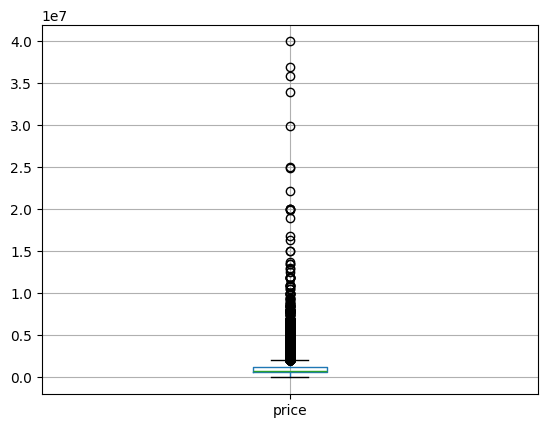

In [146]:
df_ON.boxplot(column="price")

In [147]:
q0 = df_ON["price"].quantile(0)
q1 = df_ON["price"].quantile(0.25)
q3 = df_ON["price"].quantile(0.75)
iqr = q3 - q1

print(q0, q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON[df_ON["price"]<=abs(q3+1.5*iqr)]
df_ON_norm = df_ON_norm[(df_ON_norm["price"]>=abs(q1-q0)*0.33)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

1.0 599999.75 1188000.0 588000.25
Original ON df: (35524, 21)
Normalized ON df: (32908, 21)


<Axes: >

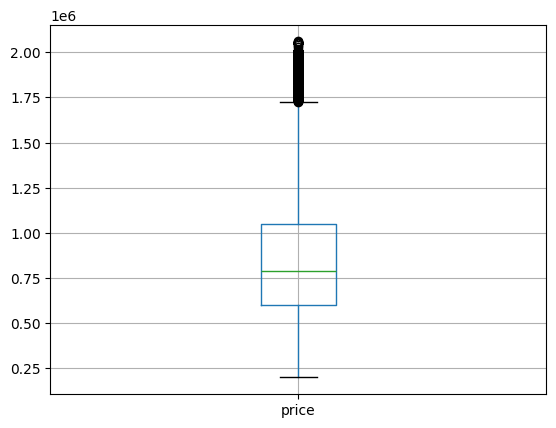

In [148]:
df_ON_norm.boxplot(column="price")

In [149]:
df_ON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35524 entries, 24005541 to X8059292
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        35524 non-null  int64  
 1   bathrooms_total           35524 non-null  int64  
 2   bedrooms_extra            35524 non-null  int64  
 3   bedrooms                  35524 non-null  int64  
 4   stories_total             35524 non-null  float64
 5   size_interior             12725 non-null  float64
 6   building_type             35524 non-null  object 
 7   agency_name               35524 non-null  object 
 8   agency_type               35524 non-null  object 
 9   property_type             35524 non-null  object 
 10  lng                       35524 non-null  float64
 11  lat                       35524 non-null  float64
 12  ownership_type            35524 non-null  object 
 13  ownership_type_group_ids  35524 non-null  object 
 14  l

<Axes: >

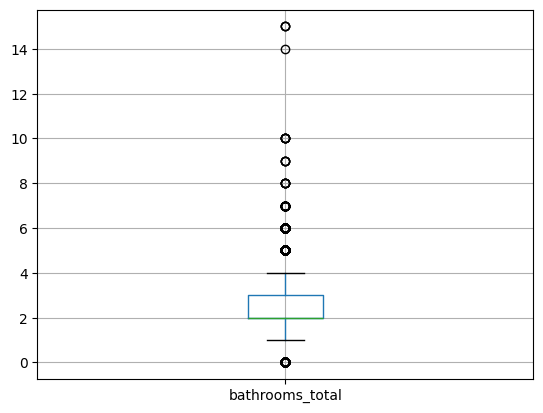

In [150]:
df_ON_norm.boxplot(column="bathrooms_total")

In [151]:
q1 = df_ON_norm["bathrooms_total"].quantile(0.25)
q3 = df_ON_norm["bathrooms_total"].quantile(0.75)
iqr = q3 - q1

print(q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON_norm[df_ON_norm["bathrooms_total"]<=abs(q3+1.5*iqr)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

2.0 3.0 1.0
Original ON df: (35524, 21)
Normalized ON df: (31909, 21)


<Axes: >

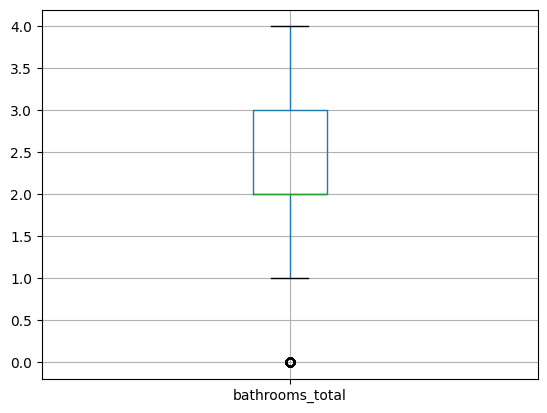

In [152]:
df_ON_norm.boxplot(column="bathrooms_total")

<Axes: >

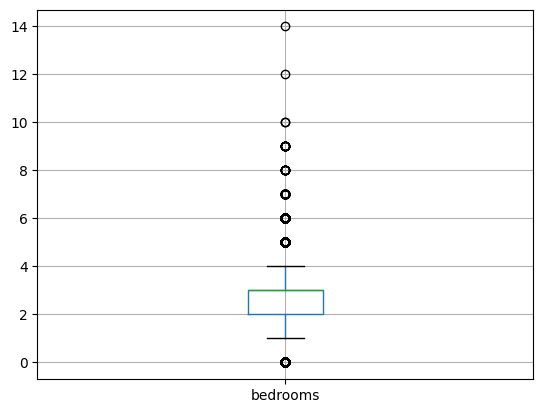

In [153]:
df_ON_norm.boxplot(column="bedrooms")

In [154]:
q1 = df_ON_norm["bedrooms"].quantile(0.25)
q3 = df_ON_norm["bedrooms"].quantile(0.75)
iqr = q3 - q1

print(q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON_norm[df_ON_norm["bedrooms"]<=abs(q3+1.5*iqr)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

2.0 3.0 1.0
Original ON df: (35524, 21)
Normalized ON df: (30862, 21)


<Axes: >

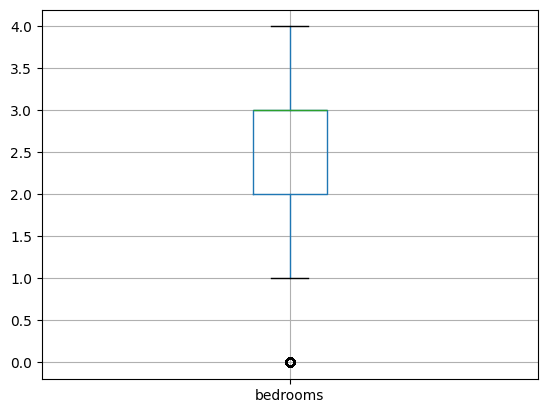

In [155]:
df_ON_norm.boxplot(column="bedrooms")

<Axes: >

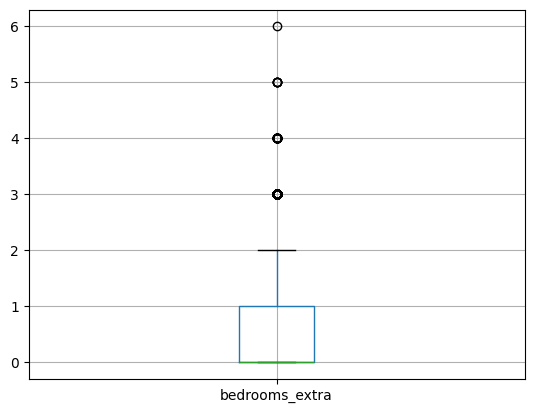

In [156]:
df_ON_norm.boxplot(column="bedrooms_extra")

In [157]:
q1 = df_ON_norm["bedrooms_extra"].quantile(0.25)
q3 = df_ON_norm["bedrooms_extra"].quantile(0.75)
iqr = q3 - q1

print(q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON_norm[df_ON_norm["bedrooms_extra"]<=abs(q3+1.5*iqr)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

0.0 1.0 1.0
Original ON df: (35524, 21)
Normalized ON df: (30439, 21)


<Axes: >

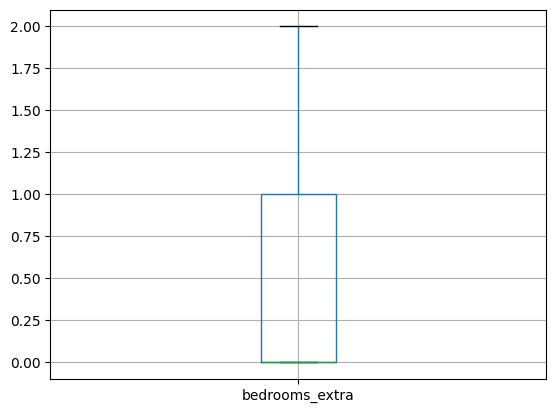

In [158]:
df_ON_norm.boxplot(column="bedrooms_extra")

<Axes: >

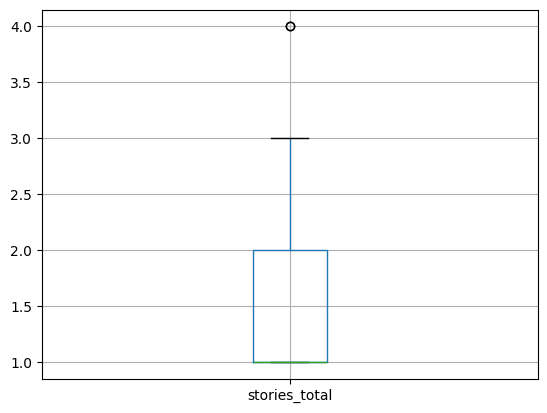

In [159]:
df_ON_norm.boxplot(column="stories_total")

In [160]:
q1 = df_ON_norm["stories_total"].quantile(0.25)
q3 = df_ON_norm["stories_total"].quantile(0.75)
iqr = q3 - q1

print(q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON_norm[df_ON_norm["stories_total"]<=abs(q3+1.5*iqr)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

1.0 2.0 1.0
Original ON df: (35524, 21)
Normalized ON df: (30437, 21)


<Axes: >

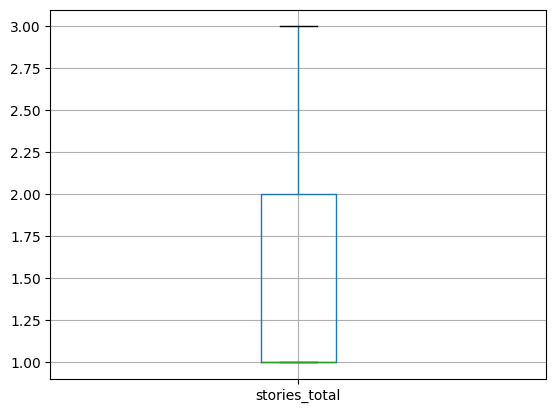

In [161]:
df_ON_norm.boxplot(column="stories_total")

<Axes: >

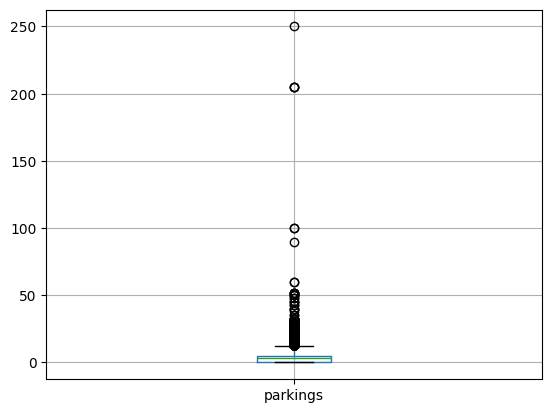

In [162]:
df_ON_norm.boxplot(column="parkings")

In [163]:
q1 = df_ON_norm["parkings"].quantile(0.25)
q3 = df_ON_norm["parkings"].quantile(0.75)
iqr = q3 - q1

print(q1, q3, iqr)

# remove outliers
df_ON_norm = df_ON_norm[df_ON_norm["parkings"]<=abs(q3+1.5*iqr)]
print("Original ON df:", df_ON.shape)
print("Normalized ON df:", df_ON_norm.shape)

0.0 5.0 5.0
Original ON df: (35524, 21)
Normalized ON df: (29693, 21)


<Axes: >

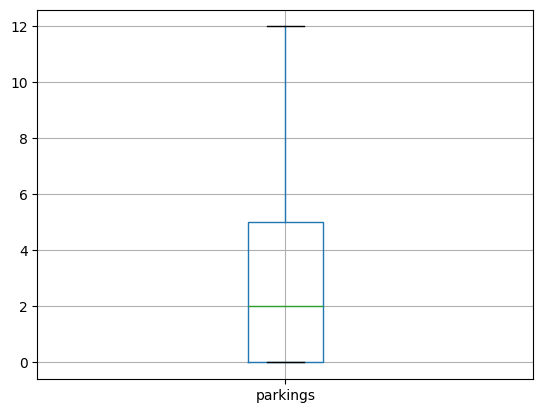

In [164]:
df_ON_norm.boxplot(column="parkings")

In [165]:
df_ON_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29693 entries, 24005541 to X8059292
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        29693 non-null  int64  
 1   bathrooms_total           29693 non-null  int64  
 2   bedrooms_extra            29693 non-null  int64  
 3   bedrooms                  29693 non-null  int64  
 4   stories_total             29693 non-null  float64
 5   size_interior             10789 non-null  float64
 6   building_type             29693 non-null  object 
 7   agency_name               29693 non-null  object 
 8   agency_type               29693 non-null  object 
 9   property_type             29693 non-null  object 
 10  lng                       29693 non-null  float64
 11  lat                       29693 non-null  float64
 12  ownership_type            29693 non-null  object 
 13  ownership_type_group_ids  29693 non-null  object 
 14  l

### Removing Price outliers from the bottom

In [166]:
df_norm = df.copy(deep=True)

In [167]:
df_norm.shape

(111525, 21)

In [168]:
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_norm[mask]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

### Removing Outliers on phase 1 features

In [169]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_norm[mask][feature].quantile(0.25)
            q3 = df_norm[mask][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [170]:
# NOT ALL province/building_type combinations might exist !!!

### LocalOutlierFactor

In [171]:
from sklearn.neighbors import LocalOutlierFactor

In [172]:
lof = LocalOutlierFactor(n_neighbors=30)
lof_labels = lof.fit_predict(df_norm[["price", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])

df_norm = df_norm[lof_labels==1]

<Axes: title={'center': 'price'}, xlabel='province'>

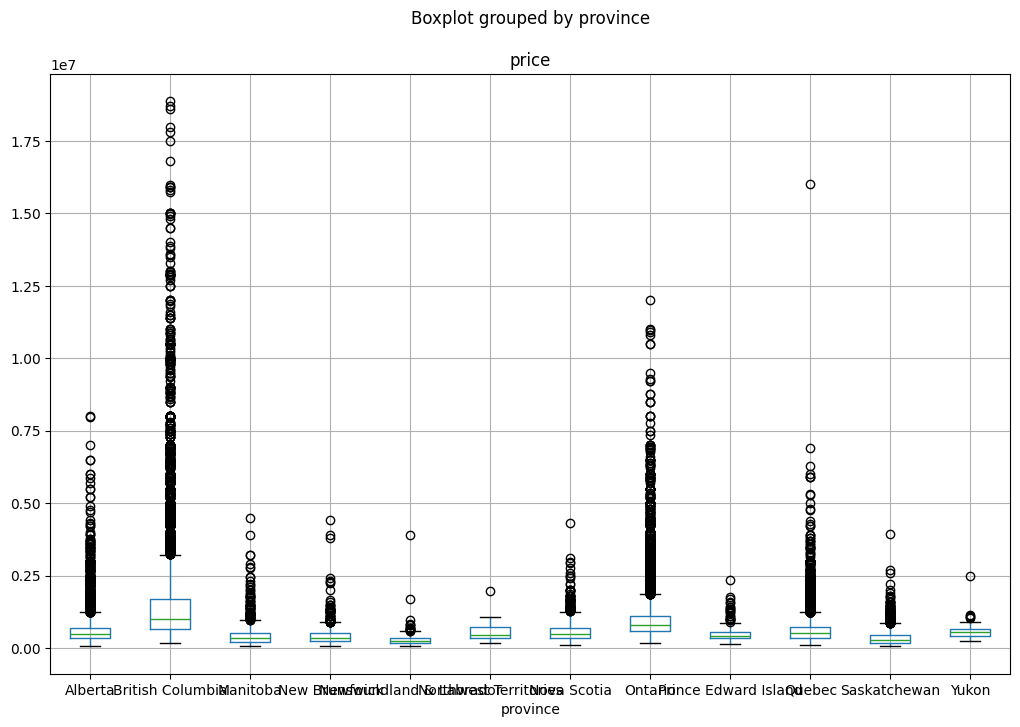

In [173]:
df_norm.boxplot(column="price", by="province", figsize=(12,8))

In [174]:
np.round(df_norm.describe())

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,parkings,timestamp,price
count,77218.0,77218.0,77218.0,77218.0,77218.0,48575.0,77218.0,77218.0,77218.0,7.721800e+04,77218.0
mean,26419075.0,2.0,0.0,3.0,1.0,2069.0,-92.0,47.0,3.0,6.384067e+17,880089.0
std,310953.0,1.0,0.0,1.0,0.0,68083.0,21.0,3.0,3.0,8.303524e+13,908693.0
min,20535215.0,0.0,0.0,0.0,1.0,1.0,-139.0,42.0,0.0,6.369052e+17,52500.0
25%,26378236.0,1.0,0.0,2.0,1.0,1065.0,-114.0,45.0,0.0,6.383980e+17,429999.0
50%,26522252.0,2.0,0.0,3.0,1.0,1454.0,-80.0,46.0,2.0,6.384370e+17,650000.0
75%,26592980.0,3.0,0.0,4.0,2.0,2089.0,-75.0,49.0,4.0,6.384542e+17,995000.0
max,26639947.0,7.0,2.0,8.0,3.0,15002000.0,-53.0,69.0,13.0,6.384646e+17,18880000.0


In [175]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
size_interior      0.673800
bathrooms_total    0.596433
bedrooms           0.331870
stories_total      0.290988
id                 0.077665
timestamp          0.077067
lat                0.072803
lng               -0.029786
bedrooms_extra          NaN
parkings                NaN
Name: price, dtype: float64

In [176]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77218 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77218 non-null  float64
 1   bathrooms_total           77218 non-null  float64
 2   bedrooms_extra            77218 non-null  float64
 3   bedrooms                  77218 non-null  float64
 4   stories_total             77218 non-null  float64
 5   size_interior             48575 non-null  float64
 6   building_type             77218 non-null  object 
 7   agency_name               77218 non-null  object 
 8   agency_type               77218 non-null  object 
 9   property_type             77218 non-null  object 
 10  lng                       77218 non-null  float64
 11  lat                       77218 non-null  float64
 12  ownership_type            77218 non-null  object 
 13  ownership_type_group_ids  77218 non-null  object 
 14  land_

In [177]:
df = df_norm.copy(deep=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77218 entries, 24005541 to 5269
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77218 non-null  float64
 1   bathrooms_total           77218 non-null  float64
 2   bedrooms_extra            77218 non-null  float64
 3   bedrooms                  77218 non-null  float64
 4   stories_total             77218 non-null  float64
 5   size_interior             48575 non-null  float64
 6   building_type             77218 non-null  object 
 7   agency_name               77218 non-null  object 
 8   agency_type               77218 non-null  object 
 9   property_type             77218 non-null  object 
 10  lng                       77218 non-null  float64
 11  lat                       77218 non-null  float64
 12  ownership_type            77218 non-null  object 
 13  ownership_type_group_ids  77218 non-null  object 
 14  land_

# Save to CSV (to be continued)

In [179]:
df.to_csv("data/data_cleaned_ph2.csv", index=False)

## Removing Unwanted Features

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72208 entries, 0 to 156387
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms_total           72208 non-null  float64
 1   bedrooms                  72208 non-null  float64
 2   bedrooms_extra            72208 non-null  float64
 3   stories_total             72208 non-null  float64
 4   size_interior             45235 non-null  float64
 5   building_type             72208 non-null  object 
 6   agency_name               72208 non-null  object 
 7   agency_type               72208 non-null  object 
 8   property_type             72208 non-null  object 
 9   lng                       72208 non-null  float64
 10  lat                       72208 non-null  float64
 11  ownership_type            72208 non-null  object 
 12  ownership_type_group_ids  72208 non-null  object 
 13  parkings                  72208 non-null  float64
 14  page_url  

In [180]:
df_proc2 = df.copy(deep=True)

In [181]:
df_proc2 = df_proc2.drop(["agency_name", "agency_type", "property_type", "ownership_type", "page_url", "timestamp", "postal_code"], axis=1)
df_proc2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72208 entries, 0 to 156387
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms_total           72208 non-null  float64
 1   bedrooms                  72208 non-null  float64
 2   bedrooms_extra            72208 non-null  float64
 3   stories_total             72208 non-null  float64
 4   size_interior             45235 non-null  float64
 5   building_type             72208 non-null  object 
 6   lng                       72208 non-null  float64
 7   lat                       72208 non-null  float64
 8   ownership_type_group_ids  72208 non-null  object 
 9   parkings                  72208 non-null  float64
 10  province                  72208 non-null  object 
 11  price                     72208 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.2+ MB


In [182]:
df = df_proc2.copy(deep=True)

## Handling Missing Values for Interior Size 

### First Looks

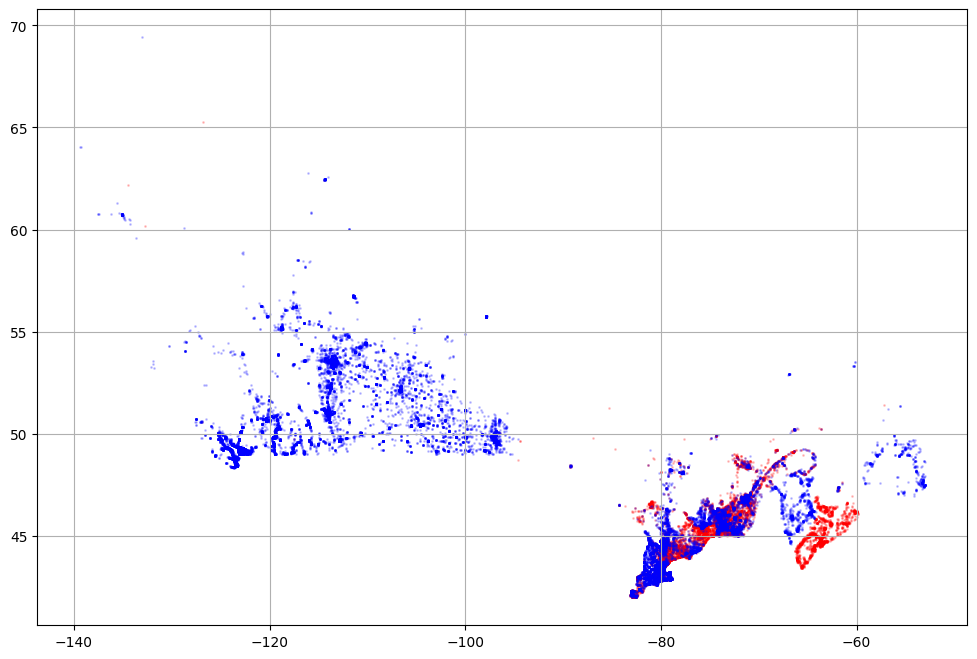

In [182]:
df_notna = df[df["size_interior"].notna()]
df_na = df[df["size_interior"].isna()]


plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(df_na["lng"], df_na["lat"], alpha=0.2, s=1, c="red")
plt.scatter(df_notna["lng"], df_notna["lat"], alpha=0.2, s=1, c="blue")


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72208 entries, 0 to 156387
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms_total           72208 non-null  float64
 1   bedrooms                  72208 non-null  float64
 2   bedrooms_extra            72208 non-null  float64
 3   stories_total             72208 non-null  float64
 4   size_interior             45235 non-null  float64
 5   building_type             72208 non-null  object 
 6   lng                       72208 non-null  float64
 7   lat                       72208 non-null  float64
 8   ownership_type_group_ids  72208 non-null  object 
 9   parkings                  72208 non-null  float64
 10  province                  72208 non-null  object 
 11  price                     72208 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.2+ MB


### Attempt 1: KNN

In [185]:
from sklearn.preprocessing import OneHotEncoder

In [186]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72208 entries, 0 to 156387
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms_total           72208 non-null  float64
 1   bedrooms                  72208 non-null  float64
 2   bedrooms_extra            72208 non-null  float64
 3   stories_total             72208 non-null  float64
 4   size_interior             45235 non-null  float64
 5   building_type             72208 non-null  object 
 6   lng                       72208 non-null  float64
 7   lat                       72208 non-null  float64
 8   ownership_type_group_ids  72208 non-null  object 
 9   parkings                  72208 non-null  float64
 10  province                  72208 non-null  object 
 11  price                     72208 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.2+ MB


In [188]:
# one_hot = OneHotEncoder()

# df_enc = one_hot.fit_transform(df)

# print(df.shape)
# print(df_enc.shape)

In [189]:
pd.get_dummies(df)

,bathrooms_total,bedrooms,bedrooms_extra,stories_total,size_interior,lng,lat,parkings,price,building_type_Apartment,...,province_Manitoba,province_New Brunswick,province_Newfoundland & Labrador,province_Northwest Territories,province_Nova Scotia,province_Ontario,province_Prince Edward Island,province_Quebec,province_Saskatchewan,province_Yukon
0,2.0,3.0,2.0,1.0,NaN,-83.046395,42.273601,0.0,699000.0,False,...,False,False,False,False,False,True,False,False,False,False
1,2.0,3.0,0.0,1.0,NaN,-83.015836,42.320056,0.0,420000.0,False,...,False,False,False,False,False,True,False,False,False,False
2,2.0,4.0,1.0,2.0,NaN,-83.010351,42.315195,0.0,499900.0,False,...,False,False,False,False,False,True,False,False,False,False
3,2.0,2.0,0.0,1.0,NaN,-83.108986,42.130896,0.0,639000.0,False,...,False,False,False,False,False,True,False,False,False,False
7,3.0,3.0,0.0,2.0,NaN,-83.036114,42.239970,0.0,1449900.0,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156350,1.0,2.0,0.0,1.0,1661.0,-113.987838,62.564480,0.0,895000.0,False,...,False,False,False,True,False,False,False,False,False,False
156353,3.0,3.0,0.0,1.0,1600.0,-139.423211,64.064606,0.0,415000.0,False,...,False,False,False,False,False,False,False,False,False,True
156356,2.0,4.0,0.0,2.0,NaN,-126.790314,65.275048,5.0,320000.0,False,...,False,False,False,False,False,True,False,False,False,False
156357,1.0,3.0,0.0,1.0,1236.0,-133.726193,68.366018,0.0,199900.0,False,...,False,False,False,True,False,False,False,False,False,False


In [190]:
imputer = KNNImputer(n_neighbors=5)
df_knn = imputer.fit_transform(pd.get_dummies(df))

: 

# Correlation / Plotting

In [ ]:
df["province"].value_counts()

province
Ontario                    22375
Quebec                     16765
British Columbia           15260
Alberta                     8634
Saskatchewan                3249
Manitoba                    2022
Nova Scotia                 1900
New Brunswick                983
Newfoundland & Labrador      475
Prince Edward Island         425
Yukon                         80
Northwest Territories         40
Name: count, dtype: int64

<Axes: xlabel='lng', ylabel='lat'>

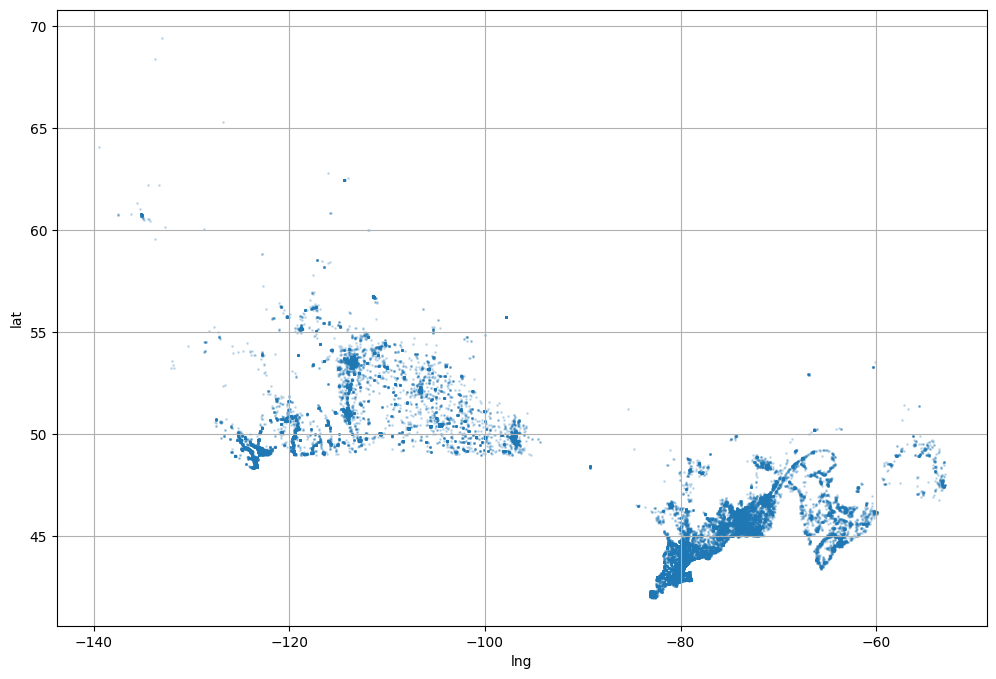

In [ ]:
df.plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

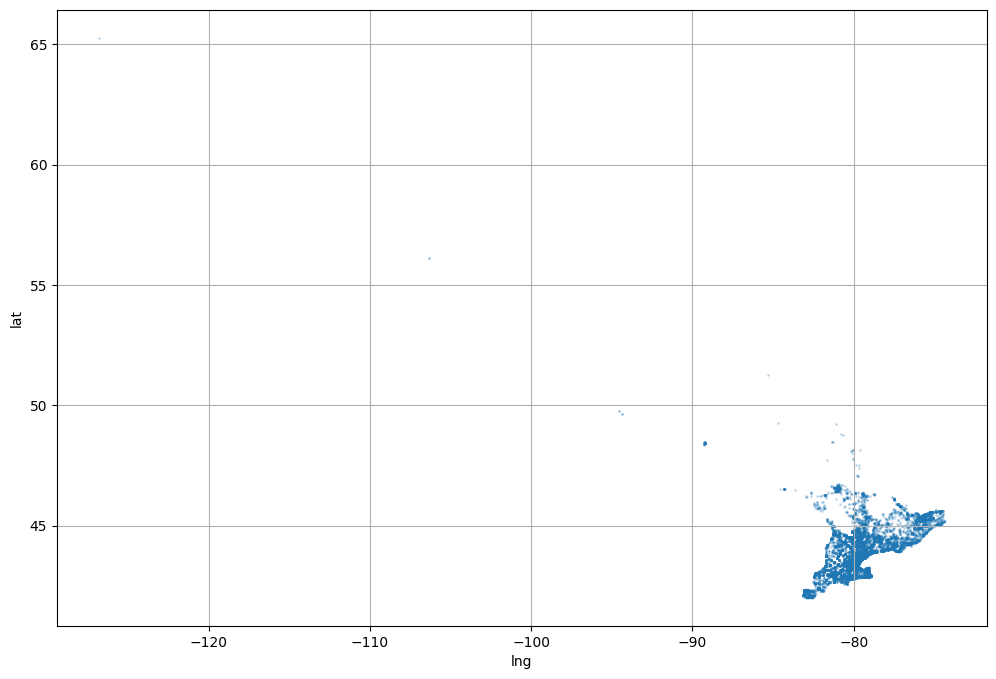

In [ ]:
df[df["province"] == "Ontario"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

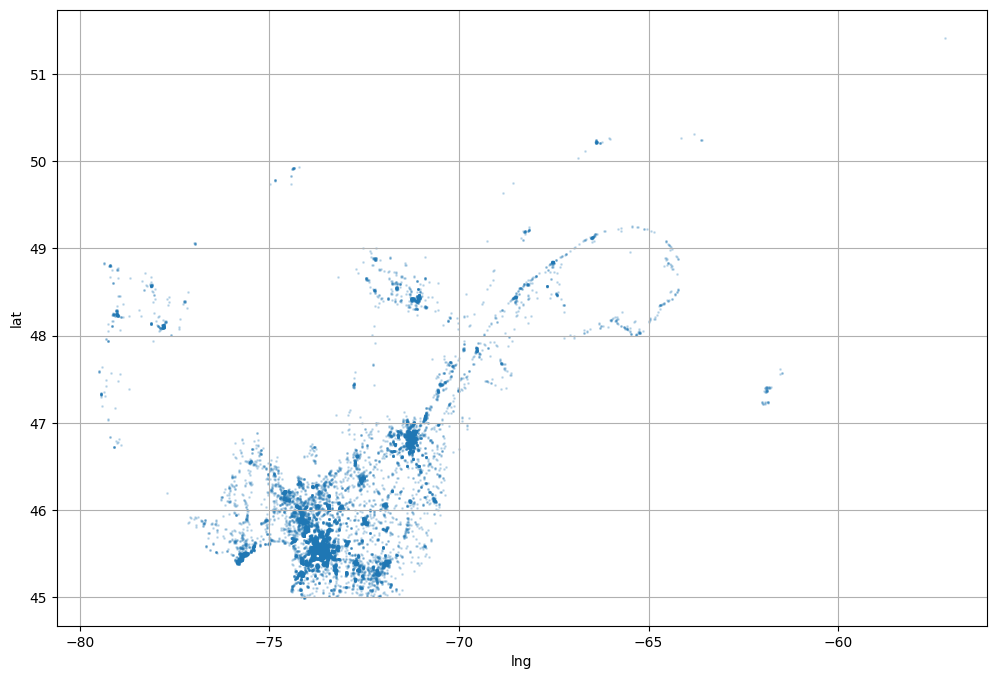

In [ ]:
df[df["province"] == "Quebec"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

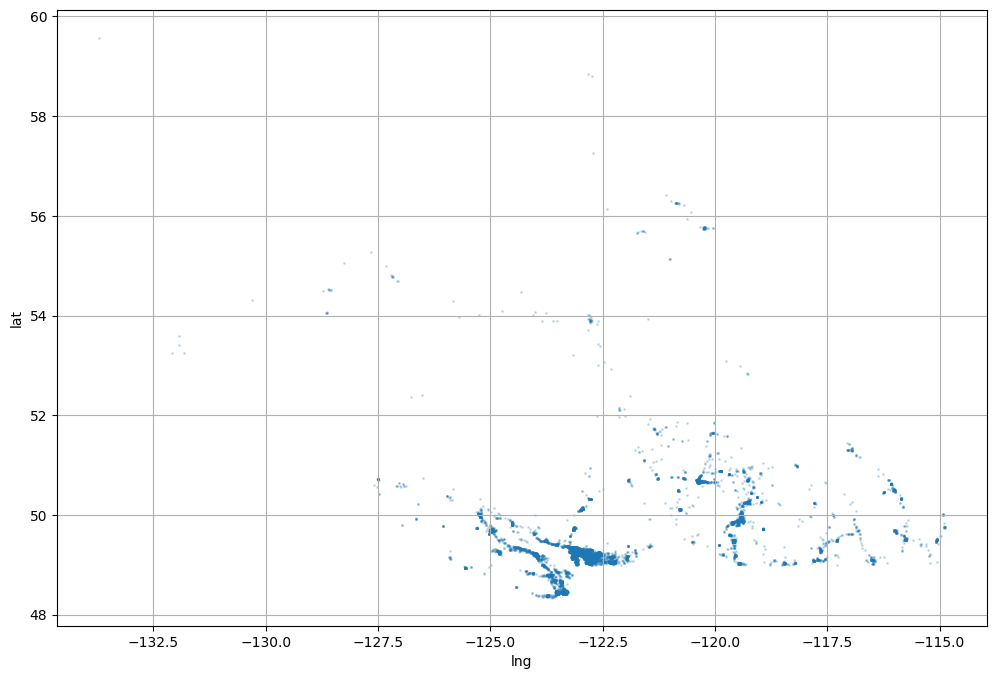

In [ ]:
df[df["province"] == "British Columbia"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
corr_matrix

,id,bathrooms_total,bedrooms,bedrooms_extra,stories_total,lng,lat,parkings,timestamp,price
id,1.000000,0.224265,0.223967,0.083283,0.033433,-0.010154,-0.151233,0.063169,0.998342,0.025221
bathrooms_total,0.224265,1.000000,0.777103,0.286265,-0.037989,-0.210316,0.000704,0.216104,0.225755,0.289029
bedrooms,0.223967,0.777103,1.000000,0.080997,-0.083372,-0.106585,-0.015093,0.231135,0.223922,0.180732
bedrooms_extra,0.083283,0.286265,0.080997,1.000000,-0.055561,0.046555,-0.110620,0.114981,0.085543,0.062436
stories_total,0.033433,-0.037989,-0.083372,-0.055561,1.000000,-0.007658,-0.004733,-0.008254,0.033664,0.005196
lng,-0.010154,-0.210316,-0.106585,0.046555,-0.007658,1.000000,-0.732953,0.075389,-0.009557,-0.142754
lat,-0.151233,0.000704,-0.015093,-0.110620,-0.004733,-0.732953,1.000000,-0.118390,-0.153447,-0.052923
parkings,0.063169,0.216104,0.231135,0.114981,-0.008254,0.075389,-0.118390,1.000000,0.062575,0.123329
timestamp,0.998342,0.225755,0.223922,0.085543,0.033664,-0.009557,-0.153447,0.062575,1.000000,0.025170
price,0.025221,0.289029,0.180732,0.062436,0.005196,-0.142754,-0.052923,0.123329,0.025170,1.000000


In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
bathrooms_total    0.289029
bedrooms           0.180732
parkings           0.123329
bedrooms_extra     0.062436
id                 0.025221
timestamp          0.025170
stories_total      0.005196
lat               -0.052923
lng               -0.142754
Name: price, dtype: float64

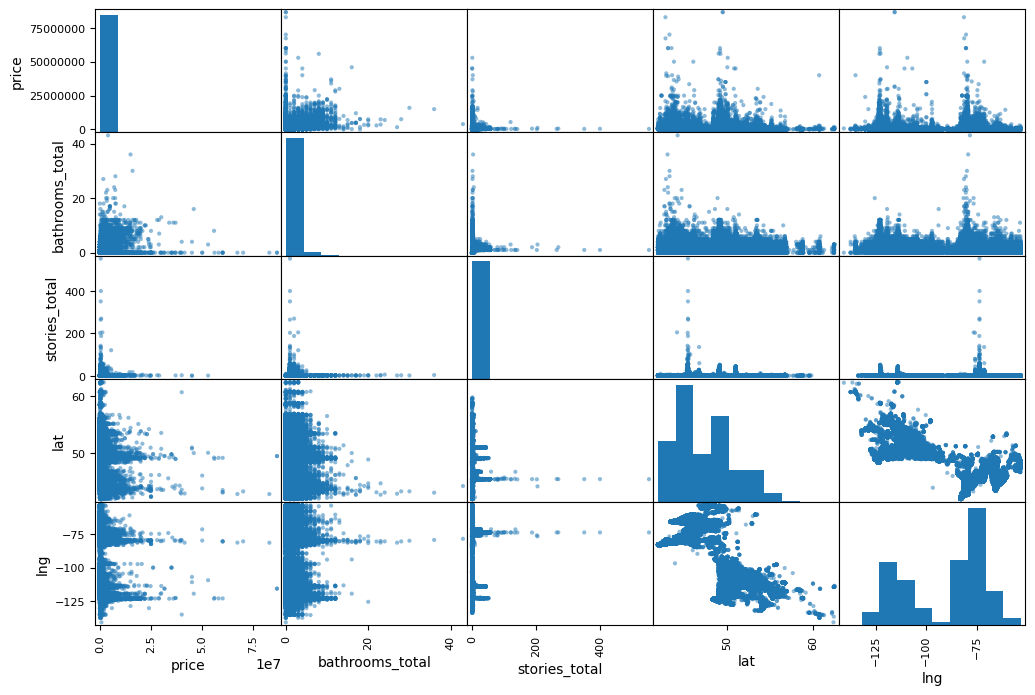

In [ ]:
pd.plotting.scatter_matrix(df[["price", "bathrooms_total", "stories_total", "lat", "lng"]], figsize=(12,8))
plt.show()

In [ ]:
df[df["property_type"] == "Vacant Land"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26456713,24001397,0,0,NaN,NaN,none,JUMP REALTY INC.,Firm,Vacant Land,-83.091293,42.188171,Freehold,360.60 X 638.69 X 301.09 X 826.39,0,https://realtor.ca/real-estate/26456713/vl-fro...,638421447604000000,N9J2P3,Ontario,699900.0
24,26446688,24001421,0,0,NaN,NaN,No Building,BOB PEDLER REAL ESTATE LIMITED,Firm,Vacant Land,-83.040967,42.283043,Freehold,50.14 FT X 150.58 FT,0,https://realtor.ca/real-estate/26446688/vl-par...,638417883447830000,N9B3X7,Ontario,69900.0
43,26439504,24001306,0,0,NaN,NaN,No Building,MANOR WINDSOR REALTY LTD. - 455,Firm,Vacant Land,-83.029588,42.317863,Freehold,59.72 FT X IRREG,0,https://realtor.ca/real-estate/26439504/vl-bra...,638416227455270000,N9A3E5,Ontario,172999.0
46,26439225,24001285,0,0,NaN,NaN,none,KEY SOLUTIONS REALTY LTD. - 390,Firm,Vacant Land,-83.039977,42.298050,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26439225/1001-t...,638416155445670000,N8X2A9,Ontario,735000.0
144,26404172,24000604,0,0,NaN,NaN,none,IDEAL: A BOUTIQUE REAL ESTATE BROKERAGE INC,Firm,Vacant Land,-83.033167,42.314672,Freehold,40 X IRREGULAR,0,https://realtor.ca/real-estate/26404172/682-wi...,638405246448770000,N9A3L5,Ontario,189000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148342,26420474,15380,0,0,NaN,NaN,none,RE/MAX ACTION REALTY,Firm,Vacant Land,-133.355602,62.227835,none,4.45 ac,0,https://realtor.ca/real-estate/26420474/14-tin...,638410342800670000,Y0B1K0,Yukon,79900.0
148349,26419774,5646,0,0,NaN,NaN,none,CENTURY 21 Prospect Realty,Firm,Vacant Land,-114.432743,62.431897,none,40375,0,https://realtor.ca/real-estate/26419774/159-en...,638410275367130000,NaN,Northwest Territories,599900.0
148358,26116167,5248,0,0,NaN,NaN,none,CENTURY 21 Prospect Realty,Firm,Vacant Land,-114.360061,62.459338,none,11551,0,https://realtor.ca/real-estate/26116167/4106-4...,638315396561270000,NaN,Northwest Territories,476000.0
148365,25629336,5426,0,0,NaN,NaN,none,COLDWELL BANKER NBS,Firm,Vacant Land,-114.415641,62.424715,none,119700,0,https://realtor.ca/real-estate/25629336/182-cu...,638206352620830000,NaN,Northwest Territories,829990.0


In [ ]:
df[df["property_type"] == "Vacant Land"]["page_url"]

2         https://realtor.ca/real-estate/26456713/vl-fro...
24        https://realtor.ca/real-estate/26446688/vl-par...
43        https://realtor.ca/real-estate/26439504/vl-bra...
46        https://realtor.ca/real-estate/26439225/1001-t...
144       https://realtor.ca/real-estate/26404172/682-wi...
                                ...                        
148342    https://realtor.ca/real-estate/26420474/14-tin...
148349    https://realtor.ca/real-estate/26419774/159-en...
148358    https://realtor.ca/real-estate/26116167/4106-4...
148365    https://realtor.ca/real-estate/25629336/182-cu...
148367    https://realtor.ca/real-estate/25176558/510651...
Name: page_url, Length: 32197, dtype: object

In [ ]:
df[df["land_size"] == "SEE REMARKS"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
46,26439225,24001285,0,0,NaN,NaN,none,KEY SOLUTIONS REALTY LTD. - 390,Firm,Vacant Land,-83.039977,42.298050,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26439225/1001-t...,638416155445670000,N8X2A9,Ontario,735000.0
362,26282411,23023157,0,0,NaN,NaN,none,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Vacant Land,-83.085679,42.053964,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26282411/vl-con...,638356720849930000,N9V2Y8,Ontario,799999.0


In [ ]:
df["land_size"].value_counts().head(50)

land_size
under 1/2 acre                  7086
0                               4632
Unknown                         2968
under 1 acre                    1216
1/2 - 1.99 acres                 802
0 x 0                            470
6000 sqft                        406
0|under 1 acre                   400
1 ac                             319
1 - 3 acres                      301
2 - 4.99 acres                   221
2 ac                             215
3 - 10 acres                     210
1/2 - 1 acre                     170
5 ac                             155
10 ac                            151
6000 sqft|4,051 - 7,250 sqft     142
0.14 ac|under 1 acre             139
5000 sqft                        138
7200 sqft                        135
x                                130
464.5 m2                         130
0.16 ac|under 1 acre             128
0.17 ac|under 1 acre             127
6250 sqft                        126
50 - 100 acres                   124
7000 sqft                   

In [ ]:
df["land_size"].value_counts().tail(20)

land_size
6164.97 m2    1
6916.7 m2     1
5002.1 m2     1
6079.5 m2     1
17588.3 m2    1
11224.6 m2    1
10184 m2      1
10221.9 m2    1
10547.6 m2    1
18669.6 m2    1
2146 m2       1
5012.5 m2     1
3838.6 m2     1
29094 sqft    1
5094.3 m2     1
5047.1 m2     1
5704.8 m2     1
8979 m2       1
7554.2 m2     1
43027         1
Name: count, dtype: int64

In [ ]:
df["size_interior"].value_counts().head(20)

size_interior
1200 sqft    238
1200.0000    190
960 sqft     178
1040 sqft    176
1120 sqft    170
1000 sqft    161
1216 sqft    152
1000.0000    150
1100.0000    147
1800 sqft    145
1400 sqft    144
900 sqft     143
1500 sqft    142
1152 sqft    130
1100 sqft    129
1500.0000    126
1600.0000    126
1400.0000    123
1080 sqft    118
1520 sqft    113
Name: count, dtype: int64

In [ ]:
df["size_interior"].value_counts().tail(20)

size_interior
1215.8800       1
5515 sqft       1
9017 sqft       1
1600.5 sqft     1
4493 sqft       1
9414 sqft       1
2518.4 sqft     1
5416.19 sqft    1
19750 sqft      1
2954 sqft       1
5112 sqft       1
7789 sqft       1
296 sqft        1
1127.7400       1
12006 sqft      1
16800 sqft      1
3643 sqft       1
2930.8600       1
1185.8100       1
2931 sqft       1
Name: count, dtype: int64

In [ ]:
df_vacant_land = df[df["property_type"] == "Vacant Land"]
df_vacant_land[df_vacant_land["size_interior"].notna()].head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
236,26376322,X7370396,0,0,NaN,9106.26 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031435,42.306148,none,50.19 x 181.49 FT,0,https://realtor.ca/real-estate/26376322/1170-p...,638394712515100000,N9A4L9,Ontario,650000.0
237,26376323,X7370408,0,0,NaN,9084.73 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031980,42.305510,none,50.11 x 181.6 FT,0,https://realtor.ca/real-estate/26376323/1181-o...,638394712516000000,N9A4K1,Ontario,650000.0
238,26376324,X7370416,0,0,NaN,18190.99 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031980,42.305510,none,100.4 x 180.6 FT,0,https://realtor.ca/real-estate/26376324/1181-o...,638394712516800000,N9A4L9,Ontario,1300000.0
966,26395735,H4182641,0,0,NaN,93810 sqft,none,"Keller Williams Edge Realty, Brokerage",Firm,Vacant Land,-82.205292,42.196457,none,159 x 590,0,https://realtor.ca/real-estate/26395735/5194-t...,638403448209000000,N0P1W0,Ontario,294999.0
1738,26127272,X7050502,0,0,NaN,131384 sqft,none,HOMELIFE SUPERSTARS REAL ESTATE LIMITED,Firm,Vacant Land,-82.440597,42.263559,none,159.81 x 541.04 Acre ; 3.02,0,https://realtor.ca/real-estate/26127272/42-mil...,638318789936400000,N0P2L0,Ontario,2500000.0


In [ ]:
df_vacant_land[df_vacant_land["size_interior"].notna()].shape

(371, 20)

In [ ]:
df_vacant_land.shape

(32197, 20)

In [ ]:
df["agency_name"].value_counts().head(20)

agency_name
eXp Realty                               2156
PROPRIO DIRECT                           1953
EXP REALTY                               1162
RIGHT AT HOME REALTY                      659
VIA CAPITALE SÉLECT                       658
Real Broker                               596
Keller Williams Capital Realty            568
CIR Realty                                552
Sutton Group-West Coast Realty            549
RE/MAX Crest Realty                       532
Royal LePage Kelowna                      528
RE/MAX Kelowna                            520
VENDIRECT INC.                            511
EXP AGENCE IMMOBILIÈRE                    508
RE/MAX CRYSTAL                            506
ROYAL LEPAGE PROALLIANCE REALTY           494
Exp Realty                                476
RE/MAX Elite                              472
Sotheby's International Realty Canada     469
RE/MAX D'ABORD INC.                       451
Name: count, dtype: int64

<Axes: title={'center': 'price'}, xlabel='province'>

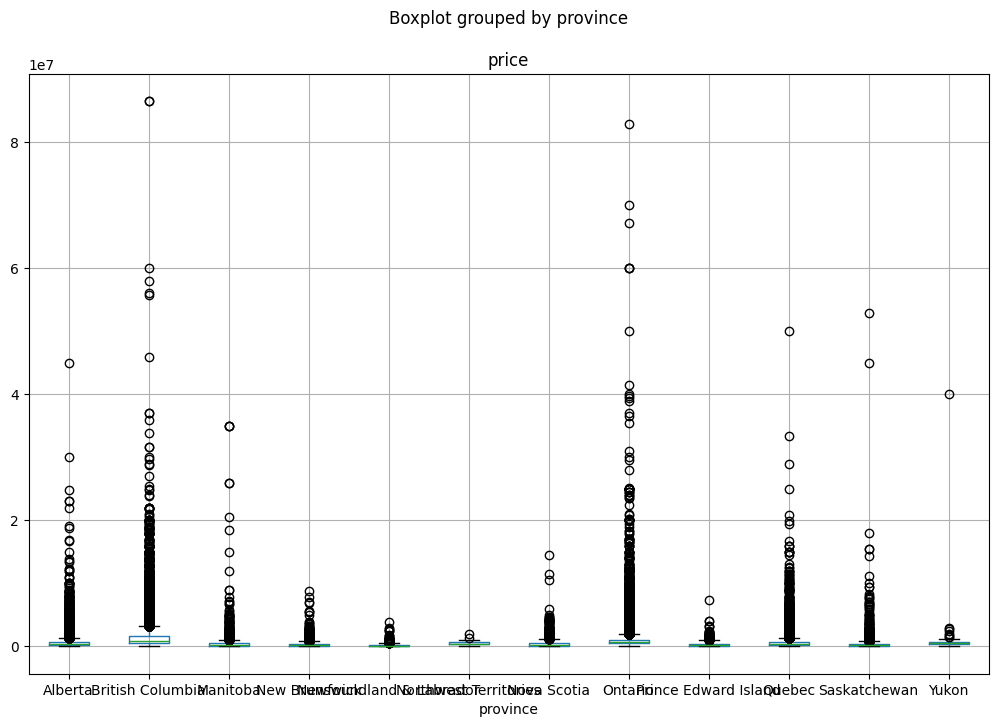

In [ ]:
df.boxplot(column="price", by="province", figsize=(12,8))

In [ ]:
df_ON = df[df["province"] == "Ontario"]
df_QC = df[df["province"] == "Quebec"]
df_BC = df[df["province"] == "British Columbia"]
df_AB = df[df["province"] == "Alberta"]
df_SK = df[df["province"] == "Saskatchewan"]
df_NS = df[df["province"] == "Nova Scotia"]
df_NB = df[df["province"] == "New Brunswick"]
df_MB = df[df["province"] == "Manitoba"]
df_NL = df[df["province"] == "Newfoundland & Labrador"]
df_PE = df[df["province"] == "Prince Edward Island"]
df_YT = df[df["province"] == "Yukon"]
df_NT = df[df["province"] == "Northwest Territories"]
df_NU = df[df["province"] == "Nunavut"] # Currently empty

<Axes: >

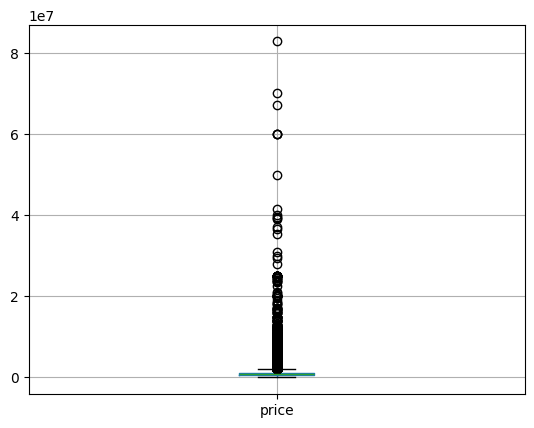

In [ ]:
df_ON.boxplot(column="price")

<Axes: ylabel='bathrooms_total'>

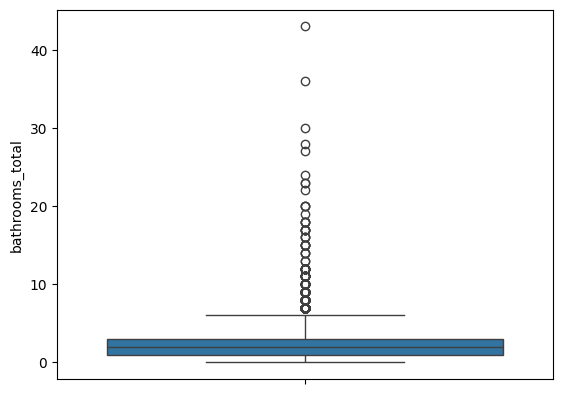

In [ ]:
sns.boxplot(df_ON["bathrooms_total"])

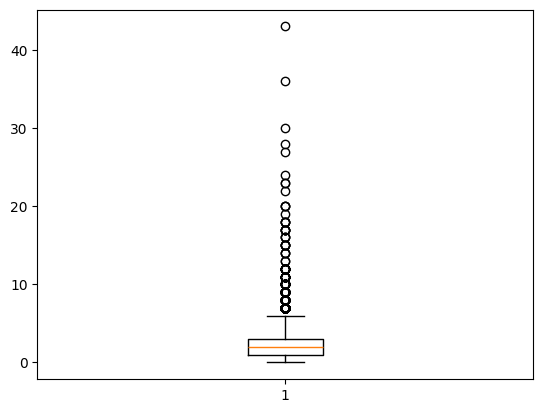

In [ ]:
plt.boxplot(df_ON["bathrooms_total"])
plt.show()

In [ ]:
df_ON[df_ON["bathrooms_total"] >= 30]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
13812,26434530,40529705,30,60,2.0,27600.0000,none,Coldwell Banker Realty In Motion,Firm,Multi-family,-79.814417,43.357911,Freehold,1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26434530/1291-n...,638414445325870000,L7P2R5,Ontario,15990000.0
17256,26395608,40525248,36,36,4.0,31065.0000,none,"BOLDT REALTY INC., BROKERAGE",Firm,Multi-family,-79.200157,43.125079,Freehold,under 1/2 acre,18,https://realtor.ca/real-estate/26395608/10-alb...,638403433402030000,L2V1P1,Ontario,15000000.0
30501,25964020,X6755256,43,0,NaN,29000 sqft,Multi-Family,RE/MAX HALLMARK EASTERN REALTY,Firm,Multi-family,-78.326866,44.298204,none,201.86 x 139.61 FT,0,https://realtor.ca/real-estate/25964020/400-wo...,638280623649530000,K9J3N5,Ontario,3995000.0


In [ ]:
df_ON[df_ON["bathrooms_total"] >= 30]["page_url"]

13812    https://realtor.ca/real-estate/26434530/1291-n...
17256    https://realtor.ca/real-estate/26395608/10-alb...
30501    https://realtor.ca/real-estate/25964020/400-wo...
Name: page_url, dtype: object

In [ ]:
';'

515950.0 1100000.0 584050.0
Original ON df: (40515, 20)
Normalized ON df: (31276, 20)


In [ ]:
q3+1.5*iqr

1976075.0

<Axes: >

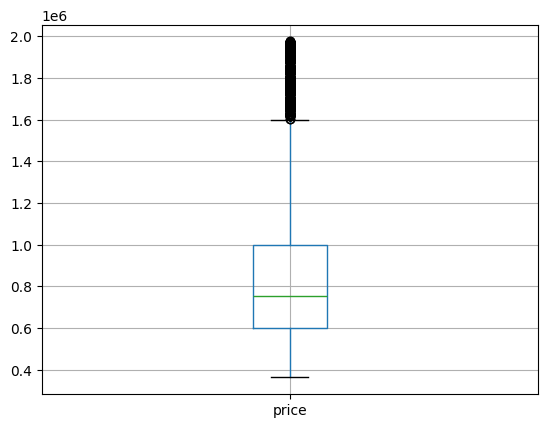

In [ ]:
df_ON_norm.boxplot(column="price")

<Axes: >

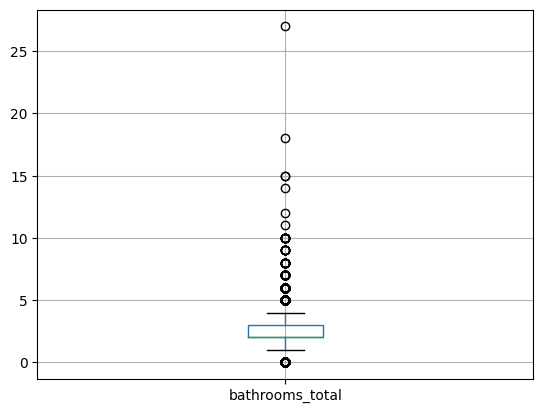

In [ ]:
df_ON_norm.boxplot(column="bathrooms_total")

In [ ]:
np.argmax(df_ON_norm["price"])

8430

In [ ]:
np.round(df_ON_norm.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,31276.0,31276.0,22954.0,31276.0,31276.0,31276.0,3.127600e+04,31276.0
mean,26297300.0,2.0,2.0,-80.0,44.0,3.0,6.383712e+17,853146.0
std,233281.0,1.0,2.0,2.0,1.0,5.0,6.303544e+13,357699.0
min,19098038.0,0.0,0.0,-95.0,42.0,0.0,6.365465e+17,362500.0
25%,26263261.0,2.0,1.0,-80.0,43.0,0.0,6.383509e+17,599000.0
50%,26372810.0,2.0,2.0,-80.0,44.0,2.0,6.383896e+17,755250.0
75%,26421191.0,3.0,2.0,-79.0,44.0,5.0,6.384104e+17,999999.0
max,26457359.0,27.0,205.0,-74.0,51.0,205.0,6.384215e+17,1975900.0


In [ ]:
df_ON_norm.head(10)

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26456962,24001582,3,4 + 0,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,-83.029887,42.141294,Freehold,130X485 FT,0,https://realtor.ca/real-estate/26456962/5341-m...,638421483713070000,N9V2Y9,Ontario,739888.0
1,26456959,24001586,2,3 + 0,NaN,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.105049,42.135395,Freehold,51.8X124.5,0,https://realtor.ca/real-estate/26456959/502-ha...,638421483701230000,N9V0A9,Ontario,759900.0
2,26456713,24001397,0,0,NaN,NaN,none,JUMP REALTY INC.,Firm,Vacant Land,-83.091293,42.188171,Freehold,360.60 X 638.69 X 301.09 X 826.39,0,https://realtor.ca/real-estate/26456713/vl-fro...,638421447604000000,N9J2P3,Ontario,699900.0
3,26456285,24001573,2,3 + 1,NaN,NaN,House,JUMP REALTY INC.,Firm,Single Family,-83.036243,42.283139,Freehold,50X116,0,https://realtor.ca/real-estate/26456285/2146-m...,638421411467270000,N9B3X9,Ontario,749900.0
4,26456146,24001565,2,2 + 0,1.0,1600.0000,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.013567,42.232631,Freehold,45.37X137.96,0,https://realtor.ca/real-estate/26456146/1331-t...,638421375479770000,N9H0L9,Ontario,789900.0
5,26456020,24001553,6,8 + 0,NaN,NaN,none,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,-83.017318,42.312901,Freehold,30X139.91 FT,0,https://realtor.ca/real-estate/26456020/1107-m...,638421339539770000,N8A2J3,Ontario,999000.0
6,26456019,24001554,3,5 + 0,2.0,NaN,Duplex,KEY SOLUTIONS REALTY LTD. - 390,Firm,Single Family,-83.044259,42.315578,Freehold,40X115,0,https://realtor.ca/real-estate/26456019/354-br...,638421339537700000,N9A4W5,Ontario,399000.0
7,26452892,24000980,2,5 + 0,2.0,NaN,Duplex,JUMP REALTY INC.,Firm,Single Family,-83.023864,42.319159,Freehold,42.99X102.39,0,https://realtor.ca/real-estate/26452892/566-pa...,638419035876970000,N9A2C3,Ontario,599000.0
10,26452303,24001530,2,2 + 0,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.024433,42.236323,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26452303/2600-s...,638418963647070000,N9H0N6,Ontario,549900.0
12,26451550,24001518,3,2 + 2,NaN,1385.0000,Row / Townhouse,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,-83.077435,42.249912,Condominium/Strata,33.53XIRREG,0,https://realtor.ca/real-estate/26451550/5915-b...,638418891572470000,N9J3Y7,Ontario,649000.0


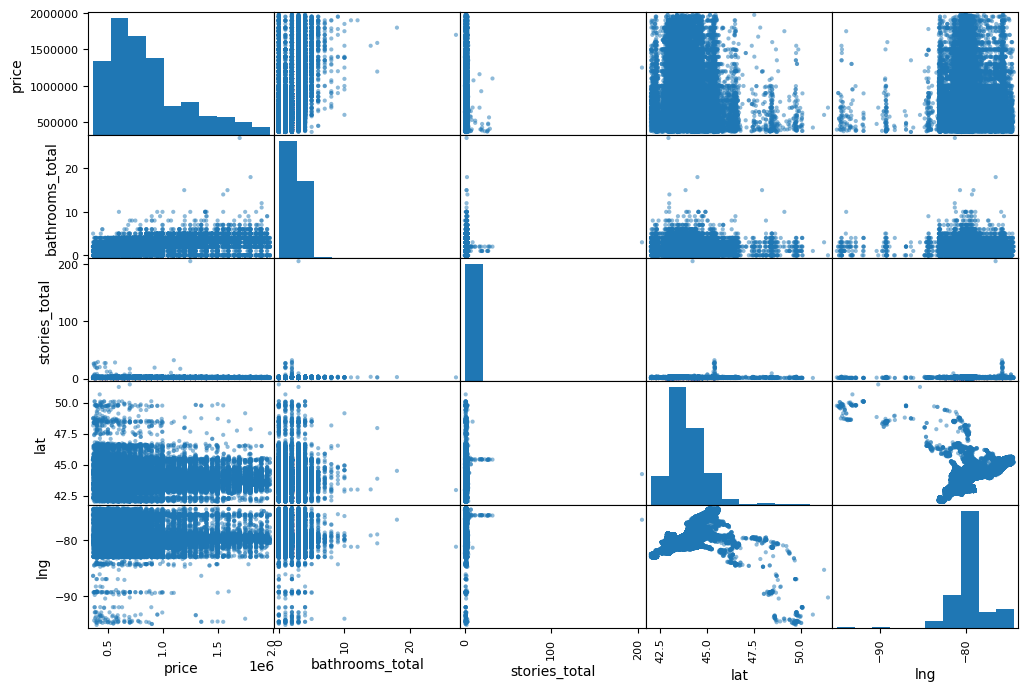

In [ ]:
pd.plotting.scatter_matrix(df_ON_norm[["price", "bathrooms_total", "stories_total", "lat", "lng"]], figsize=(12,8))
plt.show()

In [ ]:
corr_matrix = df_ON_norm.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
bathrooms_total    0.424347
parkings           0.275238
stories_total      0.059291
timestamp          0.000160
id                -0.002646
lng               -0.019047
lat               -0.058465
Name: price, dtype: float64

In [ ]:
df_no_post =  df[df["postal_code"].notna() == False]
df_no_post

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
153,26402213,23010574,4,4 + 0,2.0,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.017961,42.223486,Freehold,81.96X*,0,https://realtor.ca/real-estate/26402213/4985-t...,638405032754130000,NaN,Ontario,1599999.0
167,26401205,24000510,3,3 + 1,1.0,NaN,House,JUMP REALTY INC.,Firm,Single Family,-83.102772,42.145023,Freehold,71.42X125.52,0,https://realtor.ca/real-estate/26401205/311-li...,638404624249270000,NaN,Ontario,899999.0
606,26447466,24001460,3,3 + 1,NaN,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,-82.743101,42.293802,Freehold,59.06X154.86,0,https://realtor.ca/real-estate/26447466/1401-p...,638417991429800000,NaN,Ontario,759800.0
707,26435344,24000854,1,1 + 0,1.5,NaN,House,M.C. HOMES REALTY INC.,Firm,Single Family,-82.201036,42.406868,Freehold,50X100,0,https://realtor.ca/real-estate/26435344/133-wo...,638415296533130000,NaN,Ontario,279000.0
850,26414079,24000113,1,1 + 0,NaN,NaN,Apartment,RE/MAX Sarnia Realty Inc,Firm,Single Family,-82.408480,42.972581,Condominium/Strata,0X,0,https://realtor.ca/real-estate/26414079/155-fr...,638409247269630000,NaN,Ontario,419950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148367,25176558,5255,0,0,NaN,NaN,none,COLDWELL BANKER NBS,Firm,Vacant Land,-114.366102,62.453349,none,14500,0,https://realtor.ca/real-estate/25176558/510651...,638089810328170000,NaN,Northwest Territories,775000.0
148368,25071693,5240,0,0,NaN,1 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.346753,62.469422,none,5948,0,https://realtor.ca/real-estate/25071693/16-hea...,638042284165070000,NaN,Northwest Territories,250000.0
148369,24637907,5115,1,5,NaN,900 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.371788,62.453972,none,53792,0,https://realtor.ca/real-estate/24637907/114-bl...,637928259712070000,NaN,Northwest Territories,185000.0
148370,26310765,5593,3,4,NaN,2617 sqft,Recreational,RE/MAX North of 60,Firm,Recreational,-113.927394,62.559626,none,NaN,0,https://realtor.ca/real-estate/26310765/29-pre...,638364595503630000,NaN,Northwest Territories,1368000.0


In [ ]:
df_no_post["province"].value_counts()

province
British Columbia           357
Ontario                     77
Northwest Territories       28
Saskatchewan                23
Newfoundland & Labrador     21
Alberta                     15
Manitoba                     3
Name: count, dtype: int64

In [ ]:
df_no_post["page_url"]

153       https://realtor.ca/real-estate/26402213/4985-t...
167       https://realtor.ca/real-estate/26401205/311-li...
606       https://realtor.ca/real-estate/26447466/1401-p...
707       https://realtor.ca/real-estate/26435344/133-wo...
850       https://realtor.ca/real-estate/26414079/155-fr...
                                ...                        
148367    https://realtor.ca/real-estate/25176558/510651...
148368    https://realtor.ca/real-estate/25071693/16-hea...
148369    https://realtor.ca/real-estate/24637907/114-bl...
148370    https://realtor.ca/real-estate/26310765/29-pre...
148371    https://realtor.ca/real-estate/26249362/1006-c...
Name: page_url, Length: 524, dtype: object

In [ ]:
df_NT[df_NT["postal_code"].notna()]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
148345,26442455,5650,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.412783,62.435406,none,4910,0,https://realtor.ca/real-estate/26442455/31-bou...,638416603451570000,X1A3Y2,Northwest Territories,429900.0
148350,26397394,5644,1,2,NaN,781 sqft,Fourplex,RE/MAX North of 60,Firm,Single Family,-114.366977,62.456993,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26397394/101-49...,638403818288970000,X1A1K5,Northwest Territories,339900.0
148354,26228506,5580,2,2,NaN,1170 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,-114.368909,62.453636,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26228506/606-50...,638342979616030000,X1A3R7,Northwest Territories,387000.0
148355,26219570,5575,2,2,NaN,1090 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,-114.359966,62.448204,none,1207,0,https://realtor.ca/real-estate/26219570/101-48...,638340036748870000,X1A2K6,Northwest Territories,495000.0
148359,26078200,5539,3,4,NaN,2280 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.423378,62.445697,none,6372,0,https://realtor.ca/real-estate/26078200/6168-f...,638307832430070000,X1A3L8,Northwest Territories,765000.0
148360,25913747,5526,3,3,NaN,2679 sqft,Row / Townhouse,RE/MAX North of 60,Firm,Single Family,-114.372837,62.466438,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/25913747/19-117...,638267969328400000,X1A0B6,Northwest Territories,664900.0
148361,25913142,5525,2,2,NaN,1530 sqft,Manufactured Home,RE/MAX North of 60,Firm,Single Family,-114.426195,62.434043,none,28977,0,https://realtor.ca/real-estate/25913142/101-dr...,638267812899970000,X1A0E7,Northwest Territories,998000.0


In [ ]:
df_NT[df_NT["postal_code"].notna()]["page_url"]

148345    https://realtor.ca/real-estate/26442455/31-bou...
148350    https://realtor.ca/real-estate/26397394/101-49...
148354    https://realtor.ca/real-estate/26228506/606-50...
148355    https://realtor.ca/real-estate/26219570/101-48...
148359    https://realtor.ca/real-estate/26078200/6168-f...
148360    https://realtor.ca/real-estate/25913747/19-117...
148361    https://realtor.ca/real-estate/25913142/101-dr...
Name: page_url, dtype: object